# Monografia Mapa do mercado de trabalho na Paraíba de 2007 até 2008

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import statsmodels.api as sm
from statsmodels.iolib.table import SimpleTable
import seaborn as sns
import numpy as np
%matplotlib inline

# importação e tratamento dos dados

In [2]:
#dados extraídos do IBGE https://www.ibge.gov.br/estatisticas/sociais/trabalho/9173-pesquisa-nacional-por-amostra-de-domicilios-continua-trimestral.html?t=resultados e tratados anteriormente em excel
desemprego = pd.read_csv ('desempregobrasil.csv', sep=',')

In [4]:
#dados extraidos do IBGE em https://ftp.ibge.gov.br/Contas_Nacionais/Contas_Nacionais_Trimestrais/Tabelas_Completas/Tab_Compl_CNT.zip e tratados em excel
pib_br = pd.read_csv ('pib_br.csv', sep=';', encoding='ISO-8859–1')

In [5]:
#subindo os arquivos editados anteriormente
df07 = pd.read_csv('df07.csv', sep=';', low_memory=False)
df08 = pd.read_csv('df08.csv', sep=';', low_memory=False)
df09 = pd.read_csv('df09.csv', sep=';',low_memory=False)
df10 = pd.read_csv('df10.csv', sep=';', low_memory=False)
df11 = pd.read_csv('df11.csv', sep=';', low_memory=False)
df12 = pd.read_csv('df12.csv', sep=';', low_memory=False)
df13 = pd.read_csv('df13.csv', sep=';', low_memory=False)
df14 = pd.read_csv('df14.csv', sep=';', low_memory=False)
df15 = pd.read_csv('df15.csv', sep=';', low_memory=False)
df16 = pd.read_csv('df16.csv', sep=';', low_memory=False)
df17 = pd.read_csv('df17.csv', sep=';', low_memory=False)
df18 = pd.read_csv('df18.csv', sep=';', low_memory=False)

In [52]:
#filtrar remunerações maiores que 0 (zero)
filtro18 = df18['Vl Remun Média Nom'] > 0.0
filtro17 = df17['Vl Remun Média Nom'] > 0.0
filtro16 = df16['Vl Remun Média Nom'] > 0.0
filtro15 = df15['Vl Remun Média Nom'] > 0.0
filtro14 = df14['Vl Remun Média Nom'] > 0.0
filtro13 = df13['Vl Remun Média Nom'] > 0.0
filtro12 = df12['Vl Remun Média Nom'] > 0.0
filtro11 = df11['Vl Remun Média Nom'] > 0.0
filtro10 = df10['Vl Remun Média Nom'] > 0.0
filtro09 = df09['Vl Remun Média Nom'] > 0.0
filtro08 = df08['Vl Remun Média Nom'] > 0.0
filtro07 = df07['Vl Remun Média Nom'] > 0.0

In [53]:
df18 = df18[filtro18]
df17 = df17[filtro17]
df16 = df16[filtro16]
df15 = df15[filtro15]
df14 = df14[filtro14]
df13 = df13[filtro13]
df12 = df12[filtro12]
df11 = df11[filtro11]
df10 = df10[filtro10]
df09 = df09[filtro09]
df08 = df08[filtro08]
df07 = df07[filtro07]

In [54]:
df18['total'] = 1
df17['total'] = 1
df16['total'] = 1
df15['total'] = 1
df14['total'] = 1
df13['total'] = 1
df12['total'] = 1
df11['total'] = 1
df10['total'] = 1
df09['total'] = 1
df08['total'] = 1
df07['total'] = 1

# Capítulo 2

A DINÂMICA DA ECONOMIA ENTRE 2007 E 2018: UMA ANÁLISE PARA O BRASIL E PARA A PARAÍBA

In [10]:
#mudar virgulas por ponto
pib_br["pib"] = [x.replace(",", ".") for x in pib_br["pib"]]

In [11]:
#transformar coluna pib em float
pib_br['pib'] = pib_br['pib'].astype(float)

In [12]:
#transformar coluna pib em um objeto
pibbr = pib_br['pib']

In [18]:
#trimestres de 2012 até 2018
trim = ['1º/12', '2º/12', '3º/12', '4º/12', '1º/13', '2º/13', '3º/13', '4º/13', '1º/14', '2º/14', '3º/14', '4º/14',
       '1º/15', '2º/15', '3º/15', '4º/15', '1º/16', '2º/16', '3º/16', '4º/16', '1º/17', '2º/17', '3º/17', '4º/17', '1º/18', '2º/18', '3º/18', '4º/18' ]

In [44]:
#trimestre de 2007 até 2018
trim2 = ['1º/07', '2º/07', '3º/07', '4º/07', '1º/08', '2º/08', '3º/08', '4º/08', '1º/09', '2º/09', '3º/09', '4º/09', '1º/10', '2º/10', '3º/10', '4º/10','1º/11', '2º/11', '3º/11', '4º/11', '1º/12', '2º/12', '3º/12', '4º/12', '1º/13', '2º/13', '3º/13', '4º/13', '1º/14', '2º/14', '3º/14', '4º/14',
       '1º/15', '2º/15', '3º/15', '4º/15', '1º/16', '2º/16', '3º/16', '4º/16', '1º/17', '2º/17', '3º/17', '4º/17', '1º/18', '2º/18', '3º/18', '4º/18' ]

In [25]:
#configuração do tamanho das letras dos gráficos
title_font = {'size':'14'}
ticks_font = {'size': '14'}
legenda = {'size': '12'}

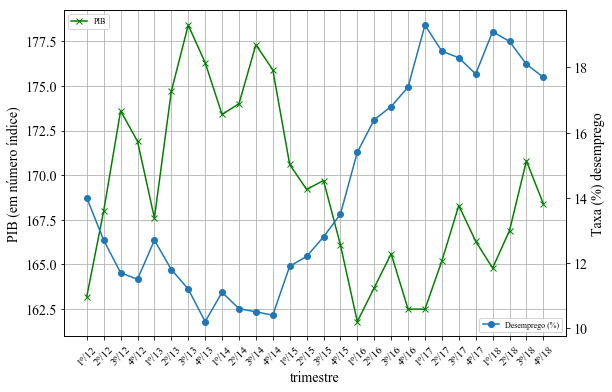

In [28]:
fig, ax1 = plt.subplots(figsize=(9, 6))
plt.rcParams['legend.fontsize'] = 8
plt.rcParams['font.family'] = 'times new roman'

ax1.set_xlabel('trimestre', **ticks_font)
ax1.set_ylabel('PIB (em número índice)', **title_font)
ax1.plot(trim, pibbr, '-x' , label='PIB', color='green')
plt.rcParams['font.family'] = 'times new roman'
plt.rcParams['xtick.labelsize'] = 11
plt.rcParams['ytick.labelsize'] = 14

#ax1.set_title('Grafico 1 - Taxa combinada da desocupação e da força de trabalho potencial\n e PIB de 2012 até 2017 - Trimestral', **title_font)
ax1.legend(loc='upper left')


ax2 = ax1.twinx()
ax2.plot(trim, des,'-o', label='Desemprego (%)')
ax2.set_ylabel('Taxa (%) desemprego', **title_font)
plt.rcParams['font.family'] = 'times new roman'
plt.rcParams['xtick.labelsize'] = 11
plt.rcParams['ytick.labelsize'] = 14

ax2.legend(loc='lower right')
ax1.grid()

ax1.xaxis.set_tick_params(rotation=45)

#plt.annotate('Fonte: Elaboração própria com dados do IBGE', xy=(45, 1), xycoords='figure pixels', **legenda)
plt.savefig ('grafico1.png')
plt.show()

In [48]:
# dados coletados do site: http://www6.sistemaindustria.org.br/gpc/externo/listaResultados.faces?codPesquisa=180
icei = pd.read_excel('icei2.xlsx')

<function matplotlib.pyplot.show(*args, **kw)>

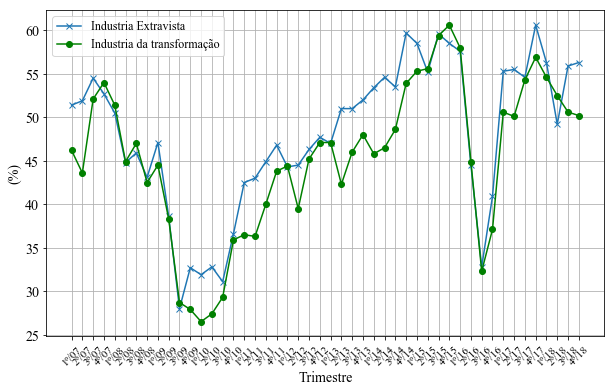

In [53]:
plt.subplots (figsize=(10,6))
plt.rcParams['font.family'] = 'times new roman'
plt.plot (trim2, icei['extravista'], '-x' , label='Industria Extravista')
plt.plot (trim2, icei['transformacao'], '-o' ,label='Industria da transformação', color='green') 
#plt.title ('Gráfico 2 - Índice de confiança do empresariado industrial\n de 2007 até 2018 - Trimestral', **title_font)
plt.grid()
plt.legend()
plt.xticks(rotation=45)
plt.ylabel('(%)', **ticks_font)
plt.xlabel('Trimestre', **ticks_font)
plt.rcParams['legend.fontsize'] = 12
#plt.annotate('Fonte: Elaboração própria de dados extraidos de CNI (2019).', xy=(40, 0), xycoords='figure pixels', **legenda)
plt.savefig ('grafico2.png')
plt.show

In [ ]:
#pib extraido e manipulado em excel de https://www.ibge.gov.br/estatisticas/economicas/contas-nacionais/9300-contas-nacionais-trimestrais.html?=&t=downloads&utm_source=landing&utm_medium=explica&utm_campaign=pib#evolucao-taxa
pib_trim = pd.read_csv('pib_br_trim_categoria.csv', sep=';')

In [ ]:
#transformar virgulas em pontos
pib_trim['PIB'] = pib_trim['PIB'].str.replace(',','.')

In [54]:
#transformar coluna em float
pib_trim['PIB']  = pib_trim['PIB'].astype(float)

In [ ]:
plt.subplots (figsize=(10,6))
plt.bar (pib_trim['trimestre'], pib_trim['PIB'])
plt.title ('Gráfico 3 - PIB de 2007 até 2019 - Trimestral', **title_font)
plt.xticks(rotation=45)
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.annotate('Fonte: Elaboração própria do PIB extraidos de IBGE/SCNT (2019).', xy=(45, 2), xycoords='figure pixels', **legenda)
#plt.savefig ('grafico13.png')
plt.show

In [ ]:
#pib extraido e manipulado em excel de https://www.ibge.gov.br/estatisticas/economicas/contas-nacionais/9300-contas-nacionais-trimestrais.html?=&t=downloads&utm_source=landing&utm_medium=explica&utm_campaign=pib#evolucao-taxa
pib_anual = pd.read_csv('pib_br_anual_categoria.csv', sep=';')

In [ ]:
#transformar virgulas em pontos
pib_anual['PIB'] = pib_anual['PIB'].str.replace(',','.')
pib_anual['PIB'] = pib_anual['PIB'].astype(float)

In [ ]:
#objeto criado com os anos de 2007 até 2019
year = ['2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']

In [ ]:
#separação dos dados de 2007 até 2019
pib_a_2007 = pib_anual['PIB'].loc[0]
pib_a_2008 = pib_anual['PIB'].loc[1]
pib_a_2009 = pib_anual['PIB'].loc[2]
pib_a_2010 = pib_anual['PIB'].loc[3]
pib_a_2011 = pib_anual['PIB'].loc[4]
pib_a_2012 = pib_anual['PIB'].loc[5]
pib_a_2013 = pib_anual['PIB'].loc[6]
pib_a_2014 = pib_anual['PIB'].loc[7]
pib_a_2015 = pib_anual['PIB'].loc[8]
pib_a_2016 = pib_anual['PIB'].loc[9]
pib_a_2017 = pib_anual['PIB'].loc[10]
pib_a_2018 = pib_anual['PIB'].loc[11]
pib_a_2019 = pib_anual['PIB'].loc[12]

In [ ]:
plt.subplots (figsize=(10,6))
pib_grafico = plt.bar (year, pib_anual['PIB'], color='green')
plt.title ('Gráfico 3 - PIB do Brasil de 2007 até 2019 - Anual', **title_font)
#plt.xticks(rotation=45)
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.annotate('Fonte: Elaboração própria do PIB extraidos de IBGE/SCNT (2019).', xy=(45, 5), xycoords='figure pixels', **legenda)
pib_grafico[2].set_color('red')
pib_grafico[8].set_color('red')
pib_grafico[9].set_color('red')
plt.axhline(0, color="k", clip_on=False)
plt.annotate ((pib_a_2007), xy=(-0.1, 6.2), ha='left', color='black', **legenda)
plt.annotate ((pib_a_2008), xy=(0.9, 5.2),  ha='left', color='black', **legenda)
plt.annotate ((pib_a_2009), xy=(1.9, -0.6),  ha='left', color='black', **legenda)
plt.annotate ((pib_a_2010), xy=(2.9, 7.6 ), ha='left', color='black', **legenda)
plt.annotate ((pib_a_2011), xy=(3.8, 4.1),  ha='left', color='black', **legenda)
plt.annotate ((pib_a_2012), xy=(4.8, 2),  ha='left', color='black', **legenda)
plt.annotate ((pib_a_2013), xy=(5.8, 3.1),  ha='left', color='black', **legenda)
plt.annotate ((pib_a_2014), xy=(6.8, 0.6),  ha='left', color='black', **legenda)
plt.annotate ((pib_a_2015), xy=(7.8, -3.9),  ha='left', color='black', **legenda)
plt.annotate ((pib_a_2016), xy=(8.8, -3.7),  ha='left', color='black', **legenda)
plt.annotate ((pib_a_2017), xy=(9.8, 1.4),  ha='left', color='black', **legenda)
plt.annotate ((pib_a_2018), xy=(10.8, 1.4),  ha='left', color='black', **legenda)
plt.annotate ((pib_a_2019), xy=(11.8, 1.2),  ha='left', color='black', **legenda)
plt.savefig ('grafico13.png')
plt.show()

In [ ]:
#importação dos dados do desemprego por cor da pele extraido do IBGE
desbr = pd.read_csv ('desemprego_br_pb.csv', sep=';')

In [ ]:
#conversão de virgulas em pontos
desbr['brancos'] = desbr['brancos'].str.replace(',','.')
desbr['pretos_pardos'] = desbr['pretos_pardos'].str.replace(',','.')
desbr['pb_brancos'] = desbr['pb_brancos'].str.replace(',','.')
desbr['pb_pardos'] = desbr['pb_pardos'].str.replace(',','.')

In [ ]:
#transformação das colunas em float
desbr['brancos'] = desbr['brancos'].astype(float)
desbr['pretos_pardos'] = desbr['pretos_pardos'].astype(float)
desbr['pb_brancos'] = desbr['pb_brancos'].astype(float)
desbr['pb_pardos'] = desbr['pb_pardos'].astype(float)

In [ ]:
#objejo criado com datas de 2012 até 2018
des_ano = ['2012', '2013', '2014', '2015', '2016', '2017', '2018']

In [ ]:
plt.subplots (figsize=(10,6))
plt.plot (des_ano, desbr['brancos'], '-x' , label='Brancos')
plt.plot (des_ano, desbr['pretos_pardos'], '-o' ,label='Pretos e Pardos', color='green') 
plt.title ('Gráfico 4 - Desemprego entre brancos e pretos e pardos em \n porcentagem no Brasil de 2012 até 2018', **title_font)
plt.rcParams['font.family'] = 'times new roman'
plt.grid()
plt.xlabel('Ano', **ticks_font)
plt.ylabel('Porcentagem (%)', **ticks_font)
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.legend()
plt.annotate('Fonte: Elaboração própria de dados extrados do IBGE (2020).', xy=(45, 4), xycoords='figure pixels', **legenda)
plt.savefig ('grafico14.png')
plt.show

In [ ]:
#importação dos dados do emprego informal no brasil #retirado do endereço https://sidra.ibge.gov.br/Tabela/4097#resultado
emprego = pd.read_csv('tabela4097.csv', sep=';', encoding='ISO-8859-1')

In [ ]:
#soma de empregos informais
emprego['informal'] = emprego['sem_carteira'] + emprego['domestico_sem_carteira'] + emprego['conta_propria']

In [ ]:
#soma de empregos formais
emprego['formal'] = emprego['carteira_assinada'] + emprego['domestico_com_carteira']

In [ ]:
plt.subplots (figsize=(10,6))
plt.plot (emprego['trimestre'], emprego['informal'], '-x' , label='sem carteira assinada')
plt.plot (emprego['trimestre'], emprego['formal'], '-o' ,label='com carteira assinada', color='green') 
plt.title ('Gráfico 5 - trabalhadores sem carteira assinada (incluindo domésticas) e por contra própria \n e trabalhadores com carteira assinada (incluindo domésticas) no Brasil de 2012 até 2019', **title_font)
plt.rcParams['font.family'] = 'times new roman'
plt.grid()
plt.xticks(rotation=45)
plt.xlabel('trimestre', **ticks_font)
plt.ylabel('milhões', **ticks_font)
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 12
plt.legend()
plt.annotate('Fonte: Elaboração própria de dados extrados do IBGE (2020).', xy=(25, 2), xycoords='figure pixels', **legenda)
plt.savefig ('grafico5.png')
plt.show

In [9]:
#analise dos estabelecimentos na paraíba

In [10]:
emp07 = pd.read_csv('emp07.csv', sep=';')
emp08 = pd.read_csv('emp08.csv', sep=';')
emp09 = pd.read_csv('emp09.csv', sep=';')
emp10 = pd.read_csv('emp10.csv', sep=';')
emp11 = pd.read_csv('emp11.csv', sep=';')
emp12 = pd.read_csv('emp12.csv', sep=';')
emp13 = pd.read_csv('emp13.csv', sep=';')
emp14 = pd.read_csv('emp14.csv', sep=';')
emp15 = pd.read_csv('emp15.csv', sep=';')
emp16 = pd.read_csv('emp16.csv', sep=';')
emp17 = pd.read_csv('emp17.csv', sep=';')
emp18 = pd.read_csv('emp18.csv', sep=';')

FileNotFoundError: [Errno 2] File b'emp07.csv' does not exist: b'emp07.csv'

In [ ]:
#criação de uma coluna com o numero 1 para poder somar mais a frente
emp07['empresas']=1
emp08['empresas']=1
emp09['empresas']=1
emp10['empresas']=1
emp11['empresas']=1
emp12['empresas']=1
emp13['empresas']=1
emp14['empresas']=1
emp15['empresas']=1
emp16['empresas']=1
emp17['empresas']=1
emp18['empresas']=1

In [ ]:
#soma das quantidades de empresas na paraiba
pb2007soma = emp07['empresas'].sum()
pb2008soma = emp08['empresas'].sum()
pb2009soma = emp09['empresas'].sum()
pb2010soma = emp10['empresas'].sum()
pb2011soma = emp11['empresas'].sum()
pb2012soma = emp12['empresas'].sum()
pb2013soma = emp13['empresas'].sum()
pb2014soma = emp14['empresas'].sum()
pb2015soma = emp15['empresas'].sum()
pb2016soma = emp16['empresas'].sum()
pb2017soma = emp17['empresas'].sum()
pb2018soma = emp18['empresas'].sum()

In [ ]:
#criação de um objeto com todas as somas 
total_pb = [pb2007soma, pb2008soma, pb2009soma, pb2010soma, pb2011soma, pb2012soma, pb2013soma, pb2014soma, pb2015soma, pb2016soma, pb2017soma, pb2018soma]

In [ ]:
#criação variavel com as datas de 207 até 2018
ano = ['2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018']

In [ ]:
plt.subplots (figsize=(10,6))
plt.plot (ano, total_pb, '-x')
plt.title ('Gráfico x - Quantidade de empresas na Paraíba de 2007 a 2018', **title_font)
plt.rcParams['font.family'] = 'times new roman'
plt.grid()
plt.xticks(rotation=45)

plt.annotate ((pb2007soma), xy=(0, (pb2007soma)), ha='right', color='black')
plt.annotate ((pb2008soma), xy=(1, (pb2008soma)), ha='right', color='black')
plt.annotate ((pb2009soma), xy=(2, (pb2009soma)), ha='right', color='black')
plt.annotate ((pb2010soma), xy=(3, (pb2010soma)), ha='right', color='black')
plt.annotate ((pb2011soma), xy=(4, (pb2011soma)), ha='right', color='black')
plt.annotate ((pb2012soma), xy=(5, (pb2012soma)), ha='right', color='black')
plt.annotate ((pb2013soma), xy=(6, (pb2013soma)), ha='right', color='black')
plt.annotate ((pb2014soma), xy=(7, (pb2014soma)), ha='right', color='black')
plt.annotate ((pb2015soma), xy=(8, (pb2015soma)), ha='right', color='black')
plt.annotate ((pb2016soma), xy=(9, (92000)), ha='left', color='black')
plt.annotate ((pb2017soma), xy=(10, (pb2017soma)), ha='right', color='black')
plt.annotate ((pb2018soma), xy=(11, (pb2018soma)), ha='right', color='black')


plt.xlabel('ano', **ticks_font)
plt.ylabel('milhares', **ticks_font)
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 12
plt.annotate('Fonte: Elaboração própria de dados extrados da RAIS (2020).', xy=(25, 2), xycoords='figure pixels', **legenda)
#plt.savefig ('grafico5.png')
plt.show

In [ ]:
#crescimento de 2007 a 2018
crescimentototal = pb2018soma - pb2007soma
crescimentototal / pb2007soma

In [ ]:
#crescimento durante periodo da crise
crescimentocrise = pb2016soma - pb2015soma
crescimentocrise / pb2015soma

In [ ]:
#crescimento pós crise
crescimentocrise1 = pb2018soma - pb2017soma
crescimentocrise1 / pb2017soma

In [ ]:
#separação dos dados das empresas do setor da industria
ind_2007 = emp07.loc[(emp07['CNAE 2.0 Classe'] >= 5000) & (emp07['CNAE 2.0 Classe'] <= 34000)]
ind_2008 = emp08.loc[(emp08['CNAE 2.0 Classe'] >= 5000) & (emp08['CNAE 2.0 Classe'] <= 34000)]
ind_2009 = emp09.loc[(emp09['CNAE 2.0 Classe'] >= 5000) & (emp09['CNAE 2.0 Classe'] <= 34000)]
ind_2010 = emp10.loc[(emp10['CNAE 2.0 Classe'] >= 5000) & (emp10['CNAE 2.0 Classe'] <= 34000)]
ind_2011 = emp11.loc[(emp11['CNAE 2.0 Classe'] >= 5000) & (emp11['CNAE 2.0 Classe'] <= 34000)]
ind_2012 = emp12.loc[(emp12['CNAE 2.0 Classe'] >= 5000) & (emp12['CNAE 2.0 Classe'] <= 34000)]
ind_2013 = emp13.loc[(emp13['CNAE 2.0 Classe'] >= 5000) & (emp13['CNAE 2.0 Classe'] <= 34000)]
ind_2014 = emp14.loc[(emp14['CNAE 2.0 Classe'] >= 5000) & (emp14['CNAE 2.0 Classe'] <= 34000)]
ind_2015 = emp15.loc[(emp15['CNAE 2.0 Classe'] >= 5000) & (emp15['CNAE 2.0 Classe'] <= 34000)]
ind_2016 = emp16.loc[(emp16['CNAE 2.0 Classe'] >= 5000) & (emp16['CNAE 2.0 Classe'] <= 34000)]
ind_2017 = emp17.loc[(emp17['CNAE 2.0 Classe'] >= 5000) & (emp17['CNAE 2.0 Classe'] <= 34000)]
ind_2018 = emp18.loc[(emp18['CNAE 2.0 Classe'] >= 5000) & (emp18['CNAE 2.0 Classe'] <= 34000)]

In [ ]:
#separação dos dados do comercio 
cor_2007 = emp07.loc[(emp07['CNAE 2.0 Classe'] >= 34001)]
cor_2008 = emp08.loc[(emp08['CNAE 2.0 Classe'] >= 34001)]
cor_2009 = emp09.loc[(emp09['CNAE 2.0 Classe'] >= 34001)]
cor_2010 = emp10.loc[(emp10['CNAE 2.0 Classe'] >= 34001)]
cor_2011 = emp11.loc[(emp11['CNAE 2.0 Classe'] >= 34001)]
cor_2012 = emp12.loc[(emp12['CNAE 2.0 Classe'] >= 34001)]
cor_2013 = emp13.loc[(emp13['CNAE 2.0 Classe'] >= 34001)]
cor_2014 = emp14.loc[(emp14['CNAE 2.0 Classe'] >= 34001)]
cor_2015 = emp15.loc[(emp15['CNAE 2.0 Classe'] >= 34001)]
cor_2016 = emp16.loc[(emp16['CNAE 2.0 Classe'] >= 34001)]
cor_2017 = emp17.loc[(emp17['CNAE 2.0 Classe'] >= 34001)]
cor_2018 = emp18.loc[(emp18['CNAE 2.0 Classe'] >= 34001)]

In [ ]:
#separação dos dados da agricultura
agr07 = emp07.loc[(emp07['CNAE 2.0 Classe'] < 5000)]
agr08 = emp08.loc[(emp08['CNAE 2.0 Classe'] < 5000)]
agr09 = emp09.loc[(emp09['CNAE 2.0 Classe'] < 5000)]
agr10 = emp10.loc[(emp10['CNAE 2.0 Classe'] < 5000)]
agr11 = emp11.loc[(emp11['CNAE 2.0 Classe'] < 5000)]
agr12 = emp12.loc[(emp12['CNAE 2.0 Classe'] < 5000)]
agr13 = emp13.loc[(emp13['CNAE 2.0 Classe'] < 5000)]
agr14 = emp14.loc[(emp14['CNAE 2.0 Classe'] < 5000)]
agr15 = emp15.loc[(emp15['CNAE 2.0 Classe'] < 5000)]
agr16 = emp16.loc[(emp16['CNAE 2.0 Classe'] < 5000)]
agr17 = emp17.loc[(emp17['CNAE 2.0 Classe'] < 5000)]
agr18 = emp18.loc[(emp18['CNAE 2.0 Classe'] < 5000)]

In [ ]:
#soma das empresas da agricultura
agrsoma07 = agr07['empresas'].sum()
agrsoma08 = agr08['empresas'].sum()
agrsoma09 = agr09['empresas'].sum()
agrsoma10 = agr10['empresas'].sum()
agrsoma11 = agr11['empresas'].sum()
agrsoma12 = agr12['empresas'].sum()
agrsoma13 = agr13['empresas'].sum()
agrsoma14 = agr14['empresas'].sum()
agrsoma15 = agr15['empresas'].sum()
agrsoma16 = agr16['empresas'].sum()
agrsoma17 = agr17['empresas'].sum()
agrsoma18 = agr18['empresas'].sum()

In [ ]:
#soma das empresas da industria
indsoma07 = ind_2007['empresas'].sum()
indsoma08 = ind_2008['empresas'].sum()
indsoma09 = ind_2009['empresas'].sum()
indsoma10 = ind_2010['empresas'].sum()
indsoma11 = ind_2011['empresas'].sum()
indsoma12 = ind_2012['empresas'].sum()
indsoma13 = ind_2013['empresas'].sum()
indsoma14 = ind_2014['empresas'].sum()
indsoma15 = ind_2015['empresas'].sum()
indsoma16 = ind_2016['empresas'].sum()
indsoma17 = ind_2017['empresas'].sum()
indsoma18 = ind_2018['empresas'].sum()

In [ ]:
#variacao das empresas do setor da industria
var_ind_01 = ((indsoma08-indsoma07)/indsoma07).round(4)
var_ind_02 = ((indsoma09-indsoma08)/indsoma08).round(4)
var_ind_03 = ((indsoma10-indsoma09)/indsoma09).round(4)
var_ind_04 = ((indsoma11-indsoma10)/indsoma10).round(4)
var_ind_05 = ((indsoma12-indsoma11)/indsoma11).round(4)
var_ind_06 = ((indsoma13-indsoma12)/indsoma12).round(4)
var_ind_07 = ((indsoma14-indsoma13)/indsoma13).round(4)
var_ind_08 = ((indsoma15-indsoma14)/indsoma14).round(4)
var_ind_09 = ((indsoma16-indsoma15)/indsoma15).round(4)
var_ind_10 = ((indsoma17-indsoma16)/indsoma16).round(4)
var_ind_11 = ((indsoma18-indsoma17)/indsoma17).round(4)

In [ ]:
#agregado das variacoes das empresas da industria
graf_var_ind = [var_ind_01, var_ind_02, var_ind_03, var_ind_04, var_ind_05, var_ind_06, var_ind_07, var_ind_08, var_ind_09, var_ind_10, var_ind_11]

In [ ]:
#soma das empresas do comércio
corsoma07 = cor_2007['empresas'].sum()
corsoma08 = cor_2008['empresas'].sum()
corsoma09 = cor_2009['empresas'].sum()
corsoma10 = cor_2010['empresas'].sum()
corsoma11 = cor_2011['empresas'].sum()
corsoma12 = cor_2012['empresas'].sum()
corsoma13 = cor_2013['empresas'].sum()
corsoma14 = cor_2014['empresas'].sum()
corsoma15 = cor_2015['empresas'].sum()
corsoma16 = cor_2016['empresas'].sum()
corsoma17 = cor_2017['empresas'].sum()
corsoma18 = cor_2018['empresas'].sum()

In [ ]:
#variação das empresas do comercio
var_cor_01 = ((corsoma08-corsoma07)/corsoma07).round(4)
var_cor_02 = ((corsoma09-corsoma08)/corsoma08).round(4)
var_cor_03 = ((corsoma10-corsoma09)/corsoma09).round(4)
var_cor_04 = ((corsoma11-corsoma10)/corsoma10).round(4)
var_cor_05 = ((corsoma12-corsoma11)/corsoma11).round(4)
var_cor_06 = ((corsoma13-corsoma12)/corsoma12).round(4)
var_cor_07 = ((corsoma14-corsoma13)/corsoma13).round(4)
var_cor_08 = ((corsoma15-corsoma14)/corsoma14).round(4)
var_cor_09 = ((corsoma16-corsoma15)/corsoma15).round(4)
var_cor_10 = ((corsoma17-corsoma16)/corsoma16).round(4)
var_cor_11 = ((corsoma18-corsoma17)/corsoma17).round(4)

In [ ]:
#variação das empresas do setor agricola
var_agr_01 = ((agrsoma08-agrsoma07)/agrsoma07).round(4)
var_agr_02 = ((agrsoma09-agrsoma08)/agrsoma08).round(4)
var_agr_03 = ((agrsoma10-agrsoma09)/agrsoma09).round(4)
var_agr_04 = ((agrsoma11-agrsoma10)/agrsoma10).round(4)
var_agr_05 = ((agrsoma12-agrsoma11)/agrsoma11).round(4)
var_agr_06 = ((agrsoma13-agrsoma12)/agrsoma12).round(4)
var_agr_07 = ((agrsoma14-agrsoma13)/agrsoma13).round(4)
var_agr_08 = ((agrsoma15-agrsoma14)/agrsoma14).round(4)
var_agr_09 = ((agrsoma16-agrsoma15)/agrsoma15).round(4)
var_agr_10 = ((agrsoma17-agrsoma16)/agrsoma16).round(4)
var_agr_11 = ((agrsoma18-agrsoma17)/agrsoma17).round(4)

In [ ]:
#agregado das variacoes das empresas do setor agricola
graf_var_agr = [var_agr_01, var_agr_02, var_agr_03, var_agr_04, var_agr_05, var_agr_06, var_agr_07, var_agr_08, var_agr_09, var_agr_10, var_agr_11]

In [ ]:
#agregado das variações das empresas do setor do comércio
graf_var_cor = [var_cor_01, var_cor_02, var_cor_03, var_cor_04, var_cor_05, var_cor_06, var_cor_07, var_cor_08, var_cor_09, var_cor_10, var_cor_11]

In [ ]:
#variação das empresas na paraíba
var01 = ((pb2008soma-pb2007soma)/pb2008soma).round(4)
var02 = ((pb2009soma-pb2008soma)/pb2008soma).round(4)
var03 = ((pb2010soma-pb2009soma)/pb2009soma).round(4)
var04 = ((pb2011soma-pb2010soma)/pb2010soma).round(4)
var05 = ((pb2012soma-pb2011soma)/pb2011soma).round(4)
var06 = ((pb2013soma-pb2012soma)/pb2012soma).round(4)
var07 = ((pb2014soma-pb2013soma)/pb2013soma).round(4)
var08 = ((pb2015soma-pb2014soma)/pb2014soma).round(4)
var09 = ((pb2016soma-pb2015soma)/pb2015soma).round(4)
var10 = ((pb2017soma-pb2016soma)/pb2016soma).round(4)
var11 = ((pb2018soma-pb2017soma)/pb2017soma).round(4)

In [ ]:
#agregado da variação
graf_var = [var01, var02, var03, var04, var05, var06, var07, var08, var09, var10, var11]

In [ ]:
#agregado industria
grupoind = [indsoma07, indsoma08, indsoma09, indsoma10, indsoma11, indsoma12, indsoma13, indsoma14, indsoma15, indsoma16, indsoma17, indsoma18]

In [ ]:
#agregado comercio
grupocor = [corsoma07, corsoma08, corsoma09, corsoma10, corsoma11, corsoma12, corsoma13, corsoma14, corsoma15, corsoma16, corsoma17, corsoma18]

In [ ]:
#objeto por ano
ano_var = ['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018']

In [ ]:
plt.subplots (figsize=(10,6))
plt.plot (ano_var, graf_var_ind, '-x', label='Industria')
plt.plot (ano_var, graf_var_cor, '-o', label='Comércio e serviços')
plt.plot (ano_var, graf_var_agr, '->', label='Agricultura')
plt.title ('Gráfico x - Quantidade de empresas por setores na Paraíba de 2008 a 2018', **title_font)
plt.rcParams['font.family'] = 'times new roman'
plt.grid()
plt.xticks(rotation=45)

plt.legend()
plt.xlabel('ano', **ticks_font)
plt.ylabel('milhares', **ticks_font)
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 12
plt.annotate('Fonte: Elaboração própria de dados extrados da RAIS (2020).', xy=(25, 2), xycoords='figure pixels', **legenda)
#plt.savefig ('grafico5.png')
plt.show

In [ ]:
#valores das variações para serem colocados no gráfico
var_por = ['-6%', '-4%', '-2%', '0', '2%', '4%', '6%', '8%', '10%']

In [ ]:
width = 0.30  

plt.figure(figsize=(10,7))

r1 = np.arange(len(graf_var_ind))
r2 = [x + width for x in r1]
r3 = [x + width for x in r2]

plt.bar (r1, graf_var_ind, width=width, label='Industria')
plt.bar (r2, graf_var_cor, width=width, label='Comércio e Serviços')
plt.bar (r3, graf_var_agr, width=width, label='Agricultura')

plt.rcParams['xtick.labelsize'] = 11
plt.rcParams['ytick.labelsize'] = 11


plt.xlabel('anos', **ticks_font)
plt.xticks([r + width for r in range(len(graf_var_ind))], ano_var, **ticks_font)
plt.yticks ([-0.06, -0.04, -0.02, 0, 0.02, 0.04, 0.06, 0.08, 0.10], var_por, **ticks_font)
plt.ylabel('Porcentagem', **ticks_font)
plt.title('Gráfico 7 - Porcentagem da variação de empresas por setores na paraíba\n de 2008 até 2018', **title_font)
plt.axhline(0, color="k", clip_on=False)
plt.annotate('Fonte: Elaboração própria de dados extrados da RAIS(2020).', xy=(25, 2), xycoords='figure pixels', **legenda)
plt.legend()
plt.savefig ('grafico6.png')
plt.show()

In [ ]:
#empresas por cidades paraibanas
jp07emp = emp07.loc[emp07['Município'] == 250750]
jp18emp = emp18.loc[emp18['Município'] == 250750]
cg07emp = emp07.loc[emp07['Município'] == 250400]
cg18emp = emp18.loc[emp18['Município'] == 250400]
pt07emp = emp07.loc[emp07['Município'] == 251080]
pt18emp = emp18.loc[emp18['Município'] == 251080]

In [ ]:
#soma das empresas por cidades paraibanas
jp07soma = jp07emp['empresas'].sum()
jp18soma = jp18emp['empresas'].sum()
cg07soma = cg07emp['empresas'].sum()
cg18soma = cg18emp['empresas'].sum()
pt07soma = pt07emp['empresas'].sum()
pt18soma = pt18emp['empresas'].sum()

In [ ]:
#soma das empresas do resto do estado
resto_estado07 = pb2007soma - (jp07soma + cg07soma + pt07soma)
resto_estado18 = pb2018soma - (jp18soma + cg18soma + pt18soma)

In [ ]:
#porcentagem das cidades em relacao a paraiba de 2007 até 2018
merjp07 = (jp07soma/pb2007soma).round(4)*100
merjp18 = (jp18soma/pb2018soma).round(4)*100
mercg07 = (cg07soma/pb2007soma).round(4)*100
mercg18 = (cg18soma/pb2018soma).round(4)*100
merpt07 = (pt07soma/pb2007soma).round(4)*100
merpt18 = (pt18soma/pb2018soma).round(4)*100
merind07 = (indsoma07/pb2007soma).round(4)*100
merind18 = (indsoma18/pb2018soma).round(4)*100
mercor07 = (corsoma07/pb2007soma).round(4)*100
mercor18 = (corsoma18/pb2018soma).round(4)*100
meragr07 = (agrsoma07/pb2007soma).round(4)*100
meragr18 = (agrsoma18/pb2018soma).round(4)*100
merres07 = (resto_estado07/pb2007soma).round(4)*100
merres18 = (resto_estado18/pb2018soma).round(4)*100

In [ ]:
#tabela com os resultados das empresas por cidades
serie1 = pd.Series ({'': 'João Pessoa', '2007': jp07soma, '2018': jp18soma, 'Variação': ((jp18soma-jp07soma)/jp07soma).round(4), 'Tamanho do mercado em 2007': merjp07, 'Tamanho do mercado em 2018': merjp18, 'Variação tamanho do mercado': (merjp18-merjp07).round(2)})
serie2 = pd.Series ({'': 'Campina Grande','2007': cg07soma, '2018': cg18soma, 'Variação': (cg18soma-cg07soma)/cg07soma, 'Tamanho do mercado em 2007': mercg07, 'Tamanho do mercado em 2018': mercg18, 'Variação tamanho do mercado': mercg18-mercg07})
serie3 = pd.Series ({'': 'Patos','2007': pt07soma, '2018': pt18soma, 'Variação': (pt18soma-pt07soma)/pt07soma, 'Tamanho do mercado em 2007': merpt07, 'Tamanho do mercado em 2018': merpt18, 'Variação tamanho do mercado': merpt18-merpt07})
serie4 = pd.Series ({'': 'Industria','2007': indsoma07, '2018': indsoma18, 'Variação': (indsoma18-indsoma07)/indsoma07, 'Tamanho do mercado em 2007': merind07, 'Tamanho do mercado em 2018': merind18, 'Variação tamanho do mercado': merind18-merind07})
serie5 = pd.Series ({'': 'Agricultura','2007': agrsoma07, '2018': agrsoma18, 'Variação': (agrsoma18-agrsoma07)/agrsoma07, 'Tamanho do mercado em 2007': meragr07, 'Tamanho do mercado em 2018': meragr18, 'Variação tamanho do mercado': meragr18-meragr07})

serie6 = pd.Series ({'': 'Comércio e Serviços','2007': corsoma07, '2018': corsoma18, 'Variação': (corsoma18-corsoma07)/corsoma07, 'Tamanho do mercado em 2007': mercor07, 'Tamanho do mercado em 2018': mercor18, 'Variação tamanho do mercado': mercor18-mercor07})
serie7 = pd.Series ({'': 'Total empresas','2007': pb2007soma, '2018': pb2018soma, 'Variação': (pb2018soma-pb2007soma)/pb2007soma, 'Tamanho do mercado em 2007': '100%', 'Tamanho do mercado em 2018': '100%', 'Variação tamanho do mercado': '100%'})
serie8 = pd.Series ({'': 'Resto do estado','2007': resto_estado07, '2018': resto_estado18, 'Variação': (resto_estado18-resto_estado07)/resto_estado07, 'Tamanho do mercado em 2007': merres07, 'Tamanho do mercado em 2018': merres18, 'Variação tamanho do mercado':merres18-merres07})


In [ ]:
#transformacao das tabelas em um objeto
tabela1 = pd.DataFrame([serie1, serie2, serie3, serie4, serie5, serie6, serie7, serie8])

In [ ]:
#exportação dos dados para excel
tabela1.to_excel("tabela1.xls")

In [61]:
#variaçãod o pib da paraiba
varpibpb = pd.read_csv('varpibpb.csv', sep=';')

In [62]:
#transformação da coluna pb em um objeto
pibpbvar = varpibpb['pb']

In [64]:
#separação dos dados por ano
pb2007v = varpibpb['pb'].loc[0]
pb2008v = varpibpb['pb'].loc[1]
pb2009v = varpibpb['pb'].loc[2]
pb2010v = varpibpb['pb'].loc[3]
pb2011v = varpibpb['pb'].loc[4]
pb2012v = varpibpb['pb'].loc[5]
pb2013v = varpibpb['pb'].loc[6]
pb2014v = varpibpb['pb'].loc[7]
pb2015v = varpibpb['pb'].loc[8]
pb2016v = varpibpb['pb'].loc[9]
pb2017v = varpibpb['pb'].loc[10]
pb2018v = varpibpb['pb'].loc[11]

In [65]:
#anos
anopib = ['2007', '2008','2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018']

In [66]:
#agregado da variação do pib
pibpbvar = [pb2007v, pb2008v, pb2009v, pb2010v, pb2011v, pb2012v, pb2013v, pb2014v, pb2015v, pb2016v, pb2017v, pb2018v]

In [68]:
#estilo do gráfico da biblioteca seaborn
sns.set(style="white", context="talk")

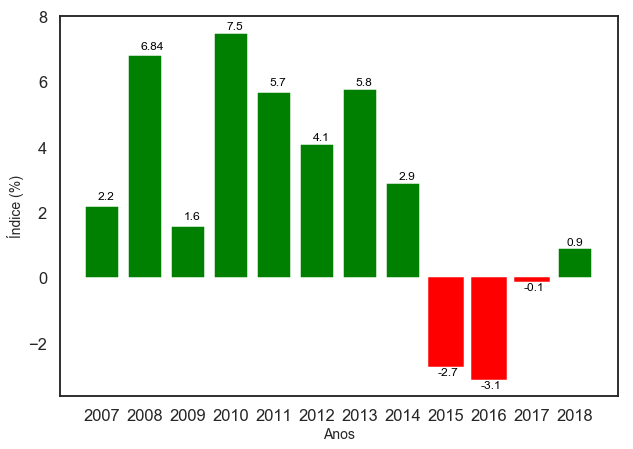

In [71]:
plt.figure(figsize=(10, 7))
graf = plt.bar (anopib, pibpbvar, label='Paraíba', color='green')
#plt.title('Gráfico 6 - Variação PIB da Paraíba \n de 2011 até 2017 (em porcentagem)', **title_font)
#plt.axhline(0)
plt.ylabel('Índice (%)', **ticks_font)
plt.xlabel('Anos', **ticks_font)
graf[8].set_color('red')
graf[9].set_color('red')
graf[10].set_color('red')
plt.annotate ((pb2007v), xy=(-0.1, 2.4), ha='left', color='black', **legenda)
plt.annotate ((pb2008v), xy=(0.9, 7),  ha='left', color='black', **legenda)
plt.annotate ((pb2009v), xy=(1.9, 1.8),  ha='left', color='black', **legenda)
plt.annotate ((pb2010v), xy=(2.9, 7.6 ), ha='left', color='black', **legenda)
plt.annotate ((pb2011v), xy=(3.9, 5.9), ha='left', color='black', **legenda)
plt.annotate ((pb2012v), xy=(4.9, 4.2),  ha='left', color='black', **legenda)
plt.annotate ((pb2013v), xy=(5.9, 5.9),  ha='left', color='black', **legenda)
plt.annotate ((pb2014v), xy=(6.9, 3 ), ha='left', color='black', **legenda)
plt.annotate ((pb2015v), xy=(7.8, -3),  ha='left', color='black', **legenda)
plt.annotate ((pb2016v), xy=(8.8, -3.4),  ha='left', color='black', **legenda)
plt.annotate ((pb2017v), xy=(9.8, -0.4),  ha='left', color='black', **legenda)
plt.annotate ((pb2018v), xy=(10.8, 1),  ha='left', color='black', **legenda)
plt.savefig ('grafico6.png')
plt.show()

# CAPÍTULO 3

In [55]:
#definações sobre setores da economia
def setor_atividade(s):
  if s < 500000:
    return 'agricultura'
  if s <= 3400000:
    return 'industria'
  if ((s >= 3400100) & (s <= 8411600)) & s > 8411600:
    return 'comercio'
  if s == 8411600:
    return 'publico'
  else:
    return 'comercioservicos'

In [56]:
#transformações sobre o formato de numeros
df07['CNAE 2.0 Subclasse'] = df07['CNAE 2.0 Subclasse'].replace('00000-1', '000001')

In [57]:
#trasnformação da coluna em float
df07['CNAE 2.0 Subclasse'] = df07['CNAE 2.0 Subclasse'].astype(int)

In [58]:
#aplicação dos setores nos dataframes
df07 ['setores'] = df07['CNAE 2.0 Subclasse'].apply(setor_atividade)
df18 ['setores'] = df18['CNAE 2.0 Subclasse'].apply(setor_atividade)

In [59]:
#definações sobre o tamanho das empresas
def tam_estb(s):
#comércio
    if (s['Tamanho Estabelecimento'] <= 3) & (s['setores'] == 'comercioservicos'):
        return 'microempresa'
    if (s['Tamanho Estabelecimento'] <= 5) & (s['setores'] == 'comercioservicos'):
        return 'epp' 
    if (s['Tamanho Estabelecimento'] <= 6) & (s['setores'] == 'comercioservicos'):
        return 'emp'
    if (s['Tamanho Estabelecimento'] > 6) & (s['setores'] == 'comercioservicos'):
        return 'egp'
#industria
    if (s['Tamanho Estabelecimento'] <= 4) & (s['setores'] == 'industria') | (s['setores'] == 'agricultura'):
        return 'microempresa'
    if (s['Tamanho Estabelecimento'] <= 6) & (s['setores'] == 'industria') | (s['setores'] == 'agricultura'):
        return 'epp'
    if (s['Tamanho Estabelecimento'] <= 8) & (s['setores'] == 'industria') | (s['setores'] == 'agricultura'):
        return 'emp'
    if (s['Tamanho Estabelecimento'] > 8) & (s['setores'] == 'industria') | (s['setores'] == 'agricultura'):
        return 'egp'
    else:
        return 'S/C'

In [60]:
#aplicação do tamanho das empresas no dataframe
df07['tam_estab'] = df07.apply(tam_estb, axis=1)

In [61]:
df18['tam_estab'] = df18.apply(tam_estb, axis=1)

In [62]:
#definições sobre os cargos
def cbo (s):
  if s < 200000:
    return 'dirigentes'
  if s < 300000:
    return 'pca'
  if s > 300000:
    return 'pnto'
  else:
    return 'outros'

In [63]:
#definições sobre as cidades
def cidades (s):
  if s == 251080:
    return 'Patos'
  if s == 250750:
    return 'João Pessoa'
  if s == 250400:
    return 'Campina Grande'
  else:
    return 'outros'

In [64]:
#tratamento dos dados por raça
df07['Raça Cor'] = df07['Raça Cor'].replace('{ñ', '-1')
df08['Raça Cor'] = df07['Raça Cor'].replace('{ñ', '-1')
df09['Raça Cor'] = df07['Raça Cor'].replace('{ñ', '-1')

df07['Raça Cor'] = df07['Raça Cor'].astype(int)
df08['Raça Cor'] = df07['Raça Cor'].astype(int)
df09['Raça Cor'] = df07['Raça Cor'].astype(int)

In [65]:
#definições sobre a cor dos trabalhandores
def cor (s):
  if s == 2:
    return 1
  if (s == 4) | (s == 8):
    return 2
  else:
    return 0

In [66]:
#substituir formato de alguns numeros
df18 ['CBO Ocupação 2002'] = df18['CBO Ocupação 2002'].replace('0000-1','00001')

In [67]:
#transformacao da coluna em inteiros
df18 ['CBO Ocupação 2002'] = df18['CBO Ocupação 2002'].astype(int)

In [68]:
#aplicacao do tipo de trabalho
df07 ['cbo'] = df07['CBO Ocupação 2002'].apply(cbo)
df18 ['cbo'] = df18['CBO Ocupação 2002'].apply(cbo)

In [69]:
#aplicacao das cidades
df07 ['cidade'] = df07['Município'].apply(cidades)
df18 ['cidade'] = df18['Município'].apply(cidades)

In [70]:
#aplicação das cores
df07 ['cor'] = df07['Raça Cor'].apply(cor)
df18 ['cor'] = df18['Raça Cor'].apply(cor)

In [71]:
#separação por sexo masculino
df18h = df18.loc[df18['Sexo Trabalhador'] == 1]
df17h = df17.loc[df17['Sexo Trabalhador'] == 1]
df16h = df16.loc[df16['Sexo Trabalhador'] == 1]
df15h = df15.loc[df15['Sexo Trabalhador'] == 1]
df14h = df14.loc[df14['Sexo Trabalhador'] == 1]
df13h = df13.loc[df13['Sexo Trabalhador'] == 1]
df12h = df12.loc[df12['Sexo Trabalhador'] == 1]
df11h = df11.loc[df11['Sexo Trabalhador'] == 1]
df10h = df10.loc[df10['Sexo Trabalhador'] == 1]
df09h = df09.loc[df09['Sexo Trabalhador'] == 1]
df08h = df08.loc[df08['Sexo Trabalhador'] == 1]
df07h = df07.loc[df07['Sexo Trabalhador'] == 1]

In [72]:
#separação por sexo feminino
df18m = df18.loc[df18['Sexo Trabalhador'] == 2]
df17m = df17.loc[df17['Sexo Trabalhador'] == 2]
df16m = df16.loc[df16['Sexo Trabalhador'] == 2]
df15m = df15.loc[df15['Sexo Trabalhador'] == 2]
df14m = df14.loc[df14['Sexo Trabalhador'] == 2]
df13m = df13.loc[df13['Sexo Trabalhador'] == 2]
df12m = df12.loc[df12['Sexo Trabalhador'] == 2]
df11m = df11.loc[df11['Sexo Trabalhador'] == 2]
df10m = df10.loc[df10['Sexo Trabalhador'] == 2]
df09m = df09.loc[df09['Sexo Trabalhador'] == 2]
df08m = df08.loc[df08['Sexo Trabalhador'] == 2]
df07m = df07.loc[df07['Sexo Trabalhador'] == 2]

KeyError: MemoryError()

In [ ]:
#quantidade de trabalhadores em geral por ano
df18soma = df18['total'].sum()
df17soma = df17['total'].sum()
df16soma = df16['total'].sum()
df15soma = df15['total'].sum()
df14soma = df14['total'].sum()
df13soma = df13['total'].sum()
df12soma = df12['total'].sum()
df11soma = df11['total'].sum()
df10soma = df10['total'].sum()
df09soma = df09['total'].sum()
df08soma = df08['total'].sum()
df07soma = df07['total'].sum()

In [ ]:
#quantidade de trabalhadores mulheres por ano
df18msoma = df18m['total'].sum()
df17msoma = df17m['total'].sum()
df16msoma = df16m['total'].sum()
df15msoma = df15m['total'].sum()
df14msoma = df14m['total'].sum()
df13msoma = df13m['total'].sum()
df12msoma = df12m['total'].sum()
df11msoma = df11m['total'].sum()
df10msoma = df10m['total'].sum()
df09msoma = df09m['total'].sum()
df08msoma = df08m['total'].sum()
df07msoma = df07m['total'].sum()

In [ ]:
#quantidade de trabalhadores homens por ano
df18hsoma = df18h['total'].sum()
df17hsoma = df17h['total'].sum()
df16hsoma = df16h['total'].sum()
df15hsoma = df15h['total'].sum()
df14hsoma = df14h['total'].sum()
df13hsoma = df13h['total'].sum()
df12hsoma = df12h['total'].sum()
df11hsoma = df11h['total'].sum()
df10hsoma = df10h['total'].sum()
df09hsoma = df09h['total'].sum()
df08hsoma = df08h['total'].sum()
df07hsoma = df07h['total'].sum()

In [ ]:
#diferença entre homens e mulheres em 2007
dif_h_m_07 = (1-(df07msoma/df07hsoma))

In [ ]:
#diferença entre homens e mulheres em 2018
dif_h_m_18 = (1-(df18msoma/df18hsoma))

In [ ]:
#agregado da quantidade de trabalhadores por sexo feminino
graf_somam = [df07msoma, df08msoma, df09msoma, df10msoma, df11msoma, df12msoma, df13msoma, df14msoma, df15msoma, df16msoma, df17msoma, df18msoma]

In [ ]:
#agregado da quantidade de trabalhadores por sexo masculino
graf_somah = [df07hsoma, df08hsoma, df09hsoma, df10hsoma, df11hsoma, df12hsoma, df13hsoma, df14hsoma, df15hsoma, df16hsoma, df17hsoma, df18hsoma]

In [ ]:
#agregrado da soma de trabalhadores
graf_soma = [df07soma, df08soma, df09soma, df10soma, df11soma, df12soma, df13soma, df14soma, df15soma, df16soma, df17soma, df18soma]

In [ ]:
#anos 
anos = ['2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018']

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7))

plt.plot (anos, graf_soma, label='Paraíba', marker='*', color='green')
plt.plot (anos, graf_somam, label='Mulheres', marker='o', color='blue')
plt.plot (anos, graf_somah, label='Homens', marker='<', color='red')
plt.title('Gráfico 8 - Quantidade de trabalhadores com carteira assinada \n na Paraíba entre 2007 e 2018', **title_font)
plt.ylabel('Em milhares', **ticks_font)

#paraiba
plt.annotate(df07soma,
            xy=(105, 260), xycoords='figure points',**legenda,)
             
plt.annotate(df18soma,
            xy=(600, 410), xycoords='figure points',**legenda)


plt.rcParams['xtick.labelsize'] = 11
plt.rcParams['ytick.labelsize'] = 11


plt.xticks(**ticks_font)
plt.yticks (**ticks_font)

#inicio da depressão
plt.annotate('Início da depressão',
            xy=(440, 415), xycoords='figure points',**legenda, xytext=(370, 350),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

#diferença entre homens e mulheres em 2007
plt.annotate((f'diferença de {dif_h_m_07:.2%}'),
            xy=(115, 105), xycoords='figure points',**legenda, xytext=(195, 130),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
#diferença entre homens e mulheres em 2018
plt.annotate((f'diferença de {dif_h_m_18:.2%}'),
            xy=(635, 150), xycoords='figure points',**legenda, xytext=(460, 170),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

plt.annotate('Fonte: Elaboração própria extraidos do RAIS (2020).', xy=(45, 5), xycoords='figure pixels', **legenda)
plt.legend()
plt.savefig ('grafico8.png')
plt.show()

In [ ]:
#crescimendo do mercado de trabalho
cresc_trab = ((df18soma - df07soma)/df07soma)
print (f'crescimento do mercado de trabalho de 2007 até 2018 foi de {cresc_trab:.2%}.')

In [ ]:
#crescimento do mercado de 2014 ate 2016
cresc_crise = ((df16soma - df14soma)/df14soma)
print (f'crescimento do mercado de trabalho entre 2014 e 2016 foi de {cresc_crise:.2%}.')

In [ ]:
#crescimento de 2016 até 2018
cresc_pos = ((df18soma - df16soma)/df16soma)
print (f'crescimento do mercado de trabalho entre 2018 e 2016 foi de {cresc_pos:.2%}.')

In [ ]:
#trabalhadores em João Pessoa de 2007 a 2018
df18jp = df18.loc[df18['Município'] == 250750]
df07jp = df07.loc[df07['Município'] == 250750]

In [ ]:
#plotagem dos dados
df18jpsoma = df18jp['total'].sum()
df07jpsoma = df07jp['total'].sum()
print (f'Número de trabalhadores em João Pessoa 2018 foi de {df18jpsoma}.')
print (f'Número de trabalhadores em João Pessoa 2007 foi de {df07jpsoma}.')

In [13]:
#trabalhadores em 2018
df18soma

NameError: name 'df18soma' is not defined

In [ ]:
#porcentagem de trabalhadores em jp em relacao a paraiba
(df18jpsoma / df18soma)*100

In [ ]:
#trabalhadores em Campina Grande de 2007 a 2018
df18cg = df18.loc[df18['Município'] == 250400]
df07cg = df07.loc[df07['Município'] == 250400]
print (f'Número de trabalhadores em Campina Grand 2018 foi de {df18jpsoma}.')
print (f'Número de trabalhadores em Campina Grand 2007 foi de {df07jpsoma}.')

In [ ]:
df18cgsoma = df18cg['total'].sum()
df07cgsoma = df07cg['total'].sum()

In [ ]:
#porcentagem em relacao ao total de trabalhadores na paraiba
(df18cgsoma / df18soma)*100

In [ ]:
#soma de jp e cg em relacao a paraiba
((df18jpsoma + df18cgsoma)/df18soma)*100

In [34]:
#% de trabalhadores por sexo
df18['Sexo Trabalhador'].value_counts(1)

1    0.563598
2    0.436402
Name: Sexo Trabalhador, dtype: float64

In [36]:
#% de trabalhadores por sexo
df07['Sexo Trabalhador'].value_counts(1)

1    0.560756
2    0.439244
Name: Sexo Trabalhador, dtype: float64

In [ ]:
trab071 = df07[df07['CNAE 2.0 Subclasse'] == '8411600']
trab072 = df07[df07['CNAE 2.0 Subclasse'] == '4120400']
trab073 = df07[df07['CNAE 2.0 Subclasse'] == '1539400']

In [ ]:
trab071soma = trab071['total'].sum()
trab072soma = trab072['total'].sum()
trab073soma = trab073['total'].sum()

In [ ]:
trab071.head()

In [ ]:
print (f'Número de trabalhadores na administração publica foi de {trab071soma}.')
print (f'Número de trabalhadores na construção de edificios foi de {trab072soma}.')
print (f'Número de trabalhadores na industria do calçado foi de {trab073soma}.')

In [ ]:
print (f'porcentagem de empregados nas empresas no setor público {(trab071soma/df07soma).round(2)*100}')
print (f'porcentagem de empregados nas empresas na construção civil {(trab072soma/df07soma).round(3)*100}')
print (f'porcentagem de empregados na industrial do calçado {(trab073soma/df07soma).round(3)*100}')

In [ ]:
#genero no setor publico
trab071h = trab071[trab071['Sexo Trabalhador'] == 1]
trab071m = trab071[trab071['Sexo Trabalhador'] == 2]
#genero na construção civil
trab072h = trab072[trab072['Sexo Trabalhador'] == 1]
trab072m = trab072[trab072['Sexo Trabalhador'] == 2]
#genero na educação superiora
trab073h = trab073[trab073['Sexo Trabalhador'] == 1]
trab073m = trab073[trab073['Sexo Trabalhador'] == 2]

In [ ]:
df18['CNAE 2.0 Subclasse'].value_counts()

In [ ]:
trab1 = df18[df18['CNAE 2.0 Subclasse'] == 8411600]
trab2 = df18[df18['CNAE 2.0 Subclasse'] == 4120400]
trab3 = df18[df18['CNAE 2.0 Subclasse'] == 8531700]

In [14]:
trab1soma = trab1['total'].sum()
trab2soma = trab2['total'].sum()
trab3soma = trab3['total'].sum()

NameError: name 'trab1' is not defined

In [ ]:
print (f'Número de trabalhadores na administração publica foi de {trab1soma}.')
print (f'Número de trabalhadores na construção de edificios foi de {trab2soma}.')
print (f'Número de trabalhadores no cnae 85317 foi de {trab3soma}.')

In [ ]:
print (f'porcentagem de empregados nas empresas no setor público {(trab1soma/df18soma).round(2)*100}')
print (f'porcentagem de empregados nas empresas na construção civil {(trab2soma/df18soma).round(3)*100}')
print (f'porcentagem de empregados nas empresas na educação superiora {(trab3soma/df18soma).round(3)*100}')

In [ ]:
#genero no setor publico
trab1h = trab1[trab1['Sexo Trabalhador'] == 1]
trab1m = trab1[trab1['Sexo Trabalhador'] == 2]
#genero na construção civil
trab2h = trab2[trab2['Sexo Trabalhador'] == 1]
trab2m = trab2[trab2['Sexo Trabalhador'] == 2]
#genero na educação superiora
trab3h = trab3[trab3['Sexo Trabalhador'] == 1]
trab3m = trab3[trab3['Sexo Trabalhador'] == 2]

In [ ]:
trab1['Sexo Trabalhador'].value_counts(1)

In [ ]:
trab2['Sexo Trabalhador'].value_counts(1)

In [ ]:
trab3['Sexo Trabalhador'].value_counts(1)

In [ ]:
trabtmedia1 = trab1['Vl Remun Média (SM)'].mean()
trabtmedia2 = trab2['Vl Remun Média (SM)'].mean()
trabtmedia3 = trab3['Vl Remun Média (SM)'].mean()

In [ ]:
print (f'média de salários setor publico (em salários mínimos) foi de {trabtmedia1:.2}')
print (f'média de salários setor publico foi de {trabtmedia2:.2}')
print (f'média de salários setor publico foi de {trabtmedia3:.2}')

In [ ]:
trabtmedia1m = trab1m['Vl Remun Média (SM)'].mean()
trabtmedia2m = trab2m['Vl Remun Média (SM)'].mean()
trabtmedia3m = trab3m['Vl Remun Média (SM)'].mean()

In [ ]:
trabtmedia1h = trab1h['Vl Remun Média (SM)'].mean()
trabtmedia2h = trab2h['Vl Remun Média (SM)'].mean()
trabtmedia3h = trab3h['Vl Remun Média (SM)'].mean()

In [ ]:
print (f'média de salários setor publico foi de {trabtmedia1m:.2}')
print (f'média de salários na construção foi de  {trabtmedia2m:.2}')
print (f'média de salários no ensino superior foi de  {trabtmedia3m:.2}')

print (f'média de salários setor publico foi de  {trabtmedia1h:.2}')
print (f'média de salários na construção foi de  {trabtmedia2h:.2}')
print (f'média de salários no ensino superior foi de  {trabtmedia3h:.2}')

In [ ]:
(1-(trabtmedia1m/trabtmedia1h))*100

In [ ]:
(1-(trabtmedia2m/trabtmedia2h))*100

In [ ]:
(1-(trabtmedia3m/trabtmedia3h))*100

In [ ]:
trab3m['CBO Ocupação 2002'].value_counts(1)

In [ ]:
trab3h['CBO Ocupação 2002'].value_counts(1)

In [ ]:
df07['CNAE 2.0 Subclasse'] = df07['CNAE 2.0 Subclasse'].replace ('00000-1', '000001')
df08['CNAE 2.0 Subclasse'] = df08['CNAE 2.0 Subclasse'].replace ('00000-1', '000001')

In [ ]:
df07['CNAE 2.0 Subclasse'] = df07['CNAE 2.0 Subclasse'].astype(int)
df08['CNAE 2.0 Subclasse'] = df08['CNAE 2.0 Subclasse'].astype(int)

In [ ]:
agr07t = df07.loc[(df07['CNAE 2.0 Subclasse'] < 500000)]
agr08t = df08.loc[(df08['CNAE 2.0 Subclasse'] < 500000)]
agr09t = df09.loc[(df09['CNAE 2.0 Subclasse'] < 500000)]
agr10t = df10.loc[(df10['CNAE 2.0 Subclasse'] < 500000)]
agr11t = df11.loc[(df11['CNAE 2.0 Subclasse'] < 500000)]
agr12t = df12.loc[(df12['CNAE 2.0 Subclasse'] < 500000)]
agr13t = df13.loc[(df13['CNAE 2.0 Subclasse'] < 500000)]
agr14t = df14.loc[(df14['CNAE 2.0 Subclasse'] < 500000)]
agr15t = df15.loc[(df15['CNAE 2.0 Subclasse'] < 500000)]
agr16t = df16.loc[(df16['CNAE 2.0 Subclasse'] < 500000)]
agr17t = df17.loc[(df17['CNAE 2.0 Subclasse'] < 500000)]
agr18t = df18.loc[(df18['CNAE 2.0 Subclasse'] < 500000)]

In [ ]:
ind_2007t = df07.loc[(df07['CNAE 2.0 Subclasse'] >= 500000) & (df07['CNAE 2.0 Subclasse'] <= 3400000)]
ind_2008t = df08.loc[(df08['CNAE 2.0 Subclasse'] >= 500000) & (df08['CNAE 2.0 Subclasse'] <= 3400000)]
ind_2009t = df09.loc[(df09['CNAE 2.0 Subclasse'] >= 500000) & (df09['CNAE 2.0 Subclasse'] <= 3400000)]
ind_2010t = df10.loc[(df10['CNAE 2.0 Subclasse'] >= 500000) & (df10['CNAE 2.0 Subclasse'] <= 3400000)]
ind_2011t = df11.loc[(df11['CNAE 2.0 Subclasse'] >= 500000) & (df11['CNAE 2.0 Subclasse'] <= 3400000)]
ind_2012t = df12.loc[(df12['CNAE 2.0 Subclasse'] >= 500000) & (df12['CNAE 2.0 Subclasse'] <= 3400000)]
ind_2013t = df13.loc[(df13['CNAE 2.0 Subclasse'] >= 500000) & (df13['CNAE 2.0 Subclasse'] <= 3400000)]
ind_2014t = df14.loc[(df14['CNAE 2.0 Subclasse'] >= 500000) & (df14['CNAE 2.0 Subclasse'] <= 3400000)]
ind_2015t = df15.loc[(df15['CNAE 2.0 Subclasse'] >= 500000) & (df15['CNAE 2.0 Subclasse'] <= 3400000)]
ind_2016t = df16.loc[(df16['CNAE 2.0 Subclasse'] >= 500000) & (df16['CNAE 2.0 Subclasse'] <= 3400000)]
ind_2017t = df17.loc[(df17['CNAE 2.0 Subclasse'] >= 500000) & (df17['CNAE 2.0 Subclasse'] <= 3400000)]
ind_2018t = df18.loc[(df18['CNAE 2.0 Subclasse'] >= 500000) & (df18['CNAE 2.0 Subclasse'] <= 3400000)]

In [ ]:
cor_2007t = df07.loc[(df07['CNAE 2.0 Subclasse'] >= 3400100) & (df07['CNAE 2.0 Subclasse'] < 8411600)]
cor_2008t = df08.loc[(df08['CNAE 2.0 Subclasse'] >= 3400100) & (df08['CNAE 2.0 Subclasse'] < 8411600)]
cor_2009t = df09.loc[(df09['CNAE 2.0 Subclasse'] >= 3400100) & (df09['CNAE 2.0 Subclasse'] < 8411600)]
cor_2010t = df10.loc[(df10['CNAE 2.0 Subclasse'] >= 3400100) & (df10['CNAE 2.0 Subclasse'] < 8411600)]
cor_2011t = df11.loc[(df11['CNAE 2.0 Subclasse'] >= 3400100) & (df11['CNAE 2.0 Subclasse'] < 8411600)]
cor_2012t = df12.loc[(df12['CNAE 2.0 Subclasse'] >= 3400100) & (df12['CNAE 2.0 Subclasse'] < 8411600)]
cor_2013t = df13.loc[(df13['CNAE 2.0 Subclasse'] >= 3400100) & (df13['CNAE 2.0 Subclasse'] < 8411600)]
cor_2014t = df14.loc[(df14['CNAE 2.0 Subclasse'] >= 3400100) & (df14['CNAE 2.0 Subclasse'] < 8411600)]
cor_2015t = df15.loc[(df15['CNAE 2.0 Subclasse'] >= 3400100) & (df15['CNAE 2.0 Subclasse'] < 8411600)]
cor_2016t = df16.loc[(df16['CNAE 2.0 Subclasse'] >= 3400100) & (df16['CNAE 2.0 Subclasse'] < 8411600)]
cor_2017t = df17.loc[(df17['CNAE 2.0 Subclasse'] >= 3400100) & (df17['CNAE 2.0 Subclasse'] < 8411600)]
cor_2018t = df18.loc[(df18['CNAE 2.0 Subclasse'] >= 3400100) & (df18['CNAE 2.0 Subclasse'] < 8411600)]


cor_2007t2 = df07.loc[(df07['CNAE 2.0 Subclasse'] > 8411600)]
cor_2008t2 = df08.loc[(df08['CNAE 2.0 Subclasse'] > 8411600)]
cor_2009t2 = df09.loc[(df09['CNAE 2.0 Subclasse'] > 8411600)]
cor_2010t2 = df10.loc[(df10['CNAE 2.0 Subclasse'] > 8411600)]
cor_2011t2 = df11.loc[(df11['CNAE 2.0 Subclasse'] > 8411600)]
cor_2012t2 = df12.loc[(df12['CNAE 2.0 Subclasse'] > 8411600)]
cor_2013t2 = df13.loc[(df13['CNAE 2.0 Subclasse'] > 8411600)]
cor_2014t2 = df14.loc[(df14['CNAE 2.0 Subclasse'] > 8411600)]
cor_2015t2 = df15.loc[(df15['CNAE 2.0 Subclasse'] > 8411600)]
cor_2016t2 = df16.loc[(df16['CNAE 2.0 Subclasse'] > 8411600)]
cor_2017t2 = df17.loc[(df17['CNAE 2.0 Subclasse'] > 8411600)]
cor_2018t2 = df18.loc[(df18['CNAE 2.0 Subclasse'] > 8411600)]

In [15]:
pub_2007t = df07.loc[(df07['CNAE 2.0 Subclasse'] == 8411600)]
pub_2008t = df08.loc[(df08['CNAE 2.0 Subclasse'] == 8411600)]
pub_2009t = df09.loc[(df09['CNAE 2.0 Subclasse'] == 8411600)]
pub_2010t = df10.loc[(df10['CNAE 2.0 Subclasse'] == 8411600)]
pub_2011t = df11.loc[(df11['CNAE 2.0 Subclasse'] == 8411600)]
pub_2012t = df12.loc[(df12['CNAE 2.0 Subclasse'] == 8411600)]
pub_2013t = df13.loc[(df13['CNAE 2.0 Subclasse'] == 8411600)]
pub_2014t = df14.loc[(df14['CNAE 2.0 Subclasse'] == 8411600)]
pub_2015t = df15.loc[(df15['CNAE 2.0 Subclasse'] == 8411600)]
pub_2016t = df16.loc[(df16['CNAE 2.0 Subclasse'] == 8411600)]
pub_2017t = df17.loc[(df17['CNAE 2.0 Subclasse'] == 8411600)]
pub_2018t = df18.loc[(df18['CNAE 2.0 Subclasse'] == 8411600)]

NameError: name 'df07' is not defined

In [ ]:
agr07tsoma = agr07t['total'].sum().astype(int)
agr08tsoma = agr08t['total'].sum().astype(int)
agr09tsoma = agr09t['total'].sum().astype(int)
agr10tsoma = agr10t['total'].sum().astype(int)
agr11tsoma = agr11t['total'].sum().astype(int)
agr12tsoma = agr12t['total'].sum().astype(int)
agr13tsoma = agr13t['total'].sum().astype(int)
agr14tsoma = agr14t['total'].sum().astype(int)
agr15tsoma = agr15t['total'].sum().astype(int)
agr16tsoma = agr16t['total'].sum().astype(int)
agr17tsoma = agr17t['total'].sum().astype(int)
agr18tsoma = agr18t['total'].sum().astype(int)

In [ ]:
agr07tmean = agr07t['Vl Remun Média (SM)'].mean()
agr08tmean = agr08t['Vl Remun Média (SM)'].mean()
agr09tmean = agr09t['Vl Remun Média (SM)'].mean()
agr10tmean = agr10t['Vl Remun Média (SM)'].mean()
agr11tmean = agr11t['Vl Remun Média (SM)'].mean()
agr12tmean = agr12t['Vl Remun Média (SM)'].mean()
agr13tmean = agr13t['Vl Remun Média (SM)'].mean()
agr14tmean = agr14t['Vl Remun Média (SM)'].mean()
agr15tmean = agr15t['Vl Remun Média (SM)'].mean()
agr16tmean = agr16t['Vl Remun Média (SM)'].mean()
agr17tmean = agr17t['Vl Remun Média (SM)'].mean()
agr18tmean = agr18t['Vl Remun Média (SM)'].mean()

In [ ]:
ind07soma = ind_2007t['total'].sum().astype(int)
ind08soma = ind_2008t['total'].sum().astype(int)
ind09soma = ind_2009t['total'].sum().astype(int)
ind10soma = ind_2010t['total'].sum().astype(int)
ind11soma = ind_2011t['total'].sum().astype(int)
ind12soma = ind_2012t['total'].sum().astype(int)
ind13soma = ind_2013t['total'].sum().astype(int)
ind14soma = ind_2014t['total'].sum().astype(int)
ind15soma = ind_2015t['total'].sum().astype(int)
ind16soma = ind_2016t['total'].sum().astype(int)
ind17soma = ind_2017t['total'].sum().astype(int)
ind18soma = ind_2018t['total'].sum().astype(int)

In [ ]:
ind07mean = ind_2007t['Vl Remun Média (SM)'].mean()
ind08mean = ind_2008t['Vl Remun Média (SM)'].mean()
ind09mean = ind_2009t['Vl Remun Média (SM)'].mean()
ind10mean = ind_2010t['Vl Remun Média (SM)'].mean()
ind11mean = ind_2011t['Vl Remun Média (SM)'].mean()
ind12mean = ind_2012t['Vl Remun Média (SM)'].mean()
ind13mean = ind_2013t['Vl Remun Média (SM)'].mean()
ind14mean = ind_2014t['Vl Remun Média (SM)'].mean()
ind15mean = ind_2015t['Vl Remun Média (SM)'].mean()
ind16mean = ind_2016t['Vl Remun Média (SM)'].mean()
ind17mean = ind_2017t['Vl Remun Média (SM)'].mean()
ind18mean = ind_2018t['Vl Remun Média (SM)'].mean()

In [ ]:
cor07 = cor_2007t.append(cor_2007t2)
cor08 = cor_2008t.append(cor_2008t2)
cor09 = cor_2009t.append(cor_2009t2)
cor10 = cor_2010t.append(cor_2010t2)
cor11 = cor_2011t.append(cor_2011t2)
cor12 = cor_2012t.append(cor_2012t2)
cor13 = cor_2013t.append(cor_2013t2)
cor14 = cor_2014t.append(cor_2014t2)
cor15 = cor_2015t.append(cor_2015t2)
cor16 = cor_2016t.append(cor_2016t2)
cor17 = cor_2017t.append(cor_2017t2)
cor18 = cor_2018t.append(cor_2018t2)

In [ ]:
cor07soma = cor07['total'].sum().astype(int)
cor08soma = cor08['total'].sum().astype(int)
cor09soma = cor09['total'].sum().astype(int)
cor10soma = cor10['total'].sum().astype(int)
cor11soma = cor11['total'].sum().astype(int)
cor12soma = cor12['total'].sum().astype(int)
cor13soma = cor13['total'].sum().astype(int)
cor14soma = cor14['total'].sum().astype(int)
cor15soma = cor15['total'].sum().astype(int)
cor16soma = cor16['total'].sum().astype(int)
cor17soma = cor17['total'].sum().astype(int)
cor18soma = cor18['total'].sum().astype(int)

In [ ]:
cor07mean = cor07['Vl Remun Média (SM)'].mean()
cor08mean = cor08['Vl Remun Média (SM)'].mean()
cor09mean = cor09['Vl Remun Média (SM)'].mean()
cor10mean = cor10['Vl Remun Média (SM)'].mean()
cor11mean = cor11['Vl Remun Média (SM)'].mean()
cor12mean = cor12['Vl Remun Média (SM)'].mean()
cor13mean = cor13['Vl Remun Média (SM)'].mean()
cor14mean = cor14['Vl Remun Média (SM)'].mean()
cor15mean = cor15['Vl Remun Média (SM)'].mean()
cor16mean = cor16['Vl Remun Média (SM)'].mean()
cor17mean = cor17['Vl Remun Média (SM)'].mean()
cor18mean = cor18['Vl Remun Média (SM)'].mean()

In [ ]:
pub07soma = pub_2007t['total'].sum().astype(int)
pub08soma = pub_2008t['total'].sum().astype(int)
pub09soma = pub_2009t['total'].sum().astype(int)
pub10soma = pub_2010t['total'].sum().astype(int)
pub11soma = pub_2011t['total'].sum().astype(int)
pub12soma = pub_2012t['total'].sum().astype(int)
pub13soma = pub_2013t['total'].sum().astype(int)
pub14soma = pub_2014t['total'].sum().astype(int)
pub15soma = pub_2015t['total'].sum().astype(int)
pub16soma = pub_2016t['total'].sum().astype(int)
pub17soma = pub_2017t['total'].sum().astype(int)
pub18soma = pub_2018t['total'].sum().astype(int)

In [ ]:
pub07mean = pub_2007t['Vl Remun Média (SM)'].mean()
pub08mean = pub_2008t['Vl Remun Média (SM)'].mean()
pub09mean = pub_2009t['Vl Remun Média (SM)'].mean()
pub10mean = pub_2010t['Vl Remun Média (SM)'].mean()
pub11mean = pub_2011t['Vl Remun Média (SM)'].mean()
pub12mean = pub_2012t['Vl Remun Média (SM)'].mean()
pub13mean = pub_2013t['Vl Remun Média (SM)'].mean()
pub14mean = pub_2014t['Vl Remun Média (SM)'].mean()
pub15mean = pub_2015t['Vl Remun Média (SM)'].mean()
pub16mean = pub_2016t['Vl Remun Média (SM)'].mean()
pub17mean = pub_2017t['Vl Remun Média (SM)'].mean()
pub18mean = pub_2018t['Vl Remun Média (SM)'].mean()

In [ ]:
#separação agricultura homens e mulheres
agr07h = agr07t.loc[agr07t['Sexo Trabalhador'] == 1]
agr07m = agr07t.loc[agr07t['Sexo Trabalhador'] == 2]

agr18h = agr18t.loc[agr18t['Sexo Trabalhador'] == 1]
agr18m = agr18t.loc[agr18t['Sexo Trabalhador'] == 2]


In [ ]:
#separação industria homens e mulheres
ind07h = ind_2007t.loc[ind_2007t['Sexo Trabalhador'] == 1]
ind07m = ind_2007t.loc[ind_2007t['Sexo Trabalhador'] == 2]

ind18h = ind_2018t.loc[ind_2018t['Sexo Trabalhador'] == 1]
ind18m = ind_2018t.loc[ind_2018t['Sexo Trabalhador'] == 2]

In [ ]:
#separação comercio homens e mulheres
cor07h = cor07.loc[cor07['Sexo Trabalhador'] == 1]
cor07m = cor07.loc[cor07['Sexo Trabalhador'] == 2]

cor18h = cor18.loc[cor18['Sexo Trabalhador'] == 1]
cor18m = cor18.loc[cor18['Sexo Trabalhador'] == 2]

In [ ]:
#separação setor publico homens e mulheres
pub07h = pub_2007t.loc[pub_2007t['Sexo Trabalhador'] == 1]
pub07m = pub_2007t.loc[pub_2007t['Sexo Trabalhador'] == 2]

pub18h = pub_2018t.loc[pub_2018t['Sexo Trabalhador'] == 1]
pub18m = pub_2018t.loc[pub_2018t['Sexo Trabalhador'] == 2]

In [ ]:
#soma agricultura h/m
agr07hsum = agr07h['total'].sum()
agr07msum = agr07m['total'].sum()

agr18hsum = agr18h['total'].sum()
agr18msum = agr18m['total'].sum()

In [ ]:
#media agricultura h/m
agr07hmean = agr07h['Vl Remun Média (SM)'].mean()
agr07mmean = agr07m['Vl Remun Média (SM)'].mean()

agr18hmean = agr18h['Vl Remun Média (SM)'].mean()
agr18mmean = agr18m['Vl Remun Média (SM)'].mean()

In [ ]:
#soma industria h/m
ind07hsum = ind07h['total'].sum()
ind07msum = ind07m['total'].sum()

ind18hsum = ind18h['total'].sum()
ind18msum = ind18m['total'].sum()

In [16]:
#media industria h/m
ind07hmean = ind07h['Vl Remun Média (SM)'].mean()
ind07mmean = ind07m['Vl Remun Média (SM)'].mean()

ind18hmean = ind18h['Vl Remun Média (SM)'].mean()
ind18mmean = ind18m['Vl Remun Média (SM)'].mean()

NameError: name 'ind07h' is not defined

In [ ]:
#soma comercio h/m
cor07hsum = cor07h['total'].sum()
cor07msum = cor07m['total'].sum()

cor18hsum = cor18h['total'].sum()
cor18msum = cor18m['total'].sum()

In [ ]:
#media comercio h/m
cor07hmean = cor07h['Vl Remun Média (SM)'].mean()
cor07mmean = cor07m['Vl Remun Média (SM)'].mean()

cor18hmean = cor18h['Vl Remun Média (SM)'].mean()
cor18mmean = cor18m['Vl Remun Média (SM)'].mean()

In [ ]:
#soma setor publico h/m
pub07hsum = ind07h['total'].sum()
pub07msum = ind07m['total'].sum()

pub18hsum = ind18h['total'].sum()
pub18msum = ind18m['total'].sum()

In [ ]:
#media setor publico h/m
pub07hmean = pub07h['Vl Remun Média (SM)'].mean()
pub07mmean = pub07m['Vl Remun Média (SM)'].mean()

pub18hmean = pub18h['Vl Remun Média (SM)'].mean()
pub18mmean = pub18m['Vl Remun Média (SM)'].mean()

In [ ]:
trab07h = df07.loc[df07['Sexo Trabalhador'] == 1]
trab07m = df07.loc[df07['Sexo Trabalhador'] == 2]

trab18h = df18.loc[df18['Sexo Trabalhador'] == 1]
trab18m = df18.loc[df18['Sexo Trabalhador'] == 2]


In [ ]:
trab07hmean = trab07h['Vl Remun Média (SM)'].mean()
trab07mmean = trab07m['Vl Remun Média (SM)'].mean()

trab18hmean = trab18h['Vl Remun Média (SM)'].mean()
trab18mmean = trab18m['Vl Remun Média (SM)'].mean()

In [ ]:
mercagr07 = agr07tsoma/df07['total'].sum()
mercind07 = ind07soma/df07['total'].sum()
merccor07 = cor07soma/df07['total'].sum()
mercpub07 = pub07soma/df07['total'].sum()

In [ ]:
mercagr18 = agr18tsoma/df18['total'].sum()
mercind18 = ind18soma/df18['total'].sum()
merccor18 = cor18soma/df18['total'].sum()
mercpub18 = pub18soma/df18['total'].sum()

In [ ]:
soma07 = agr07tsoma+cor07soma+ind07soma+pub07soma
soma18 = agr18tsoma+cor18soma+ind18soma+pub18soma

In [ ]:
soma07var = mercagr07+merccor07+mercind07+mercpub07
soma18var = mercagr18+merccor18+mercind18+mercpub18

In [ ]:
serie1t = pd.Series ({'': 'Agricultura', '2007': agr07tsoma, '2018': agr18tsoma, 'Variação': (agr18tsoma-agr07tsoma)/agr07tsoma, '% em 2007': mercagr07, '% em 2018': mercagr18, 'crescimento': mercagr18-mercagr07, 'Média SM 2007': agr07tmean, 'Média SM 2018':agr18tmean, 'Média SM Homens em 2007': agr07hmean, 'Média SM mulheres em 2007': agr07mmean, 'Média SM Homens em 2018': agr18hmean, 'Média SM mulheres em 2018': agr18mmean})
serie2t = pd.Series ({'': 'Comércio e Serviços','2007': cor07soma, '2018': cor18soma, 'Variação': (cor18soma-cor07soma)/cor07soma, '% em 2007': merccor07, '% em 2018': merccor18, 'crescimento': merccor18-merccor07, 'Média SM 2007': cor07mean, 'Média SM 2018':cor18mean, 'Média SM Homens em 2007': cor07hmean, 'Média SM mulheres em 2007': cor07mmean, 'Média SM Homens em 2018': cor18hmean, 'Média SM mulheres em 2018': cor18mmean})
serie3t = pd.Series ({'': 'Industria','2007': ind07soma, '2018': ind18soma, 'Variação': (ind18soma-ind07soma)/ind07soma, '% em 2007': mercind07, '% em 2018': mercind18, 'crescimento': mercind18-mercind07, 'Média SM 2007': ind07mean, 'Média SM 2018':ind18mean, 'Média SM Homens em 2007': ind07hmean, 'Média SM mulheres em 2007': ind07mmean, 'Média SM Homens em 2018': ind18hmean, 'Média SM mulheres em 2018': ind18mmean})
serie4t = pd.Series ({'': 'Setor Público','2007': pub07soma, '2018': pub08soma, 'Variação': (pub18soma-pub07soma)/pub07soma, '% em 2007': mercpub07, '% em 2018': mercpub18, 'crescimento': mercpub18-mercpub07, 'Média SM 2007': pub07mean, 'Média SM 2018':pub18mean, 'Média SM Homens em 2007': pub07hmean, 'Média SM mulheres em 2007': pub07mmean, 'Média SM Homens em 2018': pub18hmean, 'Média SM mulheres em 2018': pub18mmean})

serie5t = pd.Series ({'': 'total','2007': soma07, '2018': soma18, 'Variação': (soma18-soma07)/soma07, '% em 2007': soma07var, '% em 2018': soma18var, 'crescimento': '-', 'Média SM 2007': df07['Vl Remun Média (SM)'].mean(), 'Média SM 2018':df18['Vl Remun Média (SM)'].mean() , 'Média SM Homens em 2007': trab07hmean , 'Média SM mulheres em 2007': trab07mmean, 'Média SM Homens em 2018': trab18hmean, 'Média SM mulheres em 2018': trab18mmean})


In [ ]:
tabela2 = pd.DataFrame([serie1t, serie2t, serie3t, serie4t, serie5t])

In [ ]:
tabela2_excel = tabela2.to_excel('tabela2.xls', index=False)

In [ ]:
df18['total'].sum()

In [ ]:
mediatotal18h = df18h['Vl Remun Média (SM)'].mean()
mediatotal17h = df17h['Vl Remun Média (SM)'].mean()
mediatotal16h = df16h['Vl Remun Média (SM)'].mean()
mediatotal15h = df15h['Vl Remun Média (SM)'].mean()
mediatotal14h = df14h['Vl Remun Média (SM)'].mean()
mediatotal13h = df13h['Vl Remun Média (SM)'].mean()
mediatotal12h = df12h['Vl Remun Média (SM)'].mean()
mediatotal11h = df11h['Vl Remun Média (SM)'].mean()
mediatotal10h = df10h['Vl Remun Média (SM)'].mean()
mediatotal09h = df09h['Vl Remun Média (SM)'].mean()
mediatotal08h = df08h['Vl Remun Média (SM)'].mean()
mediatotal07h = df07h['Vl Remun Média (SM)'].mean()

In [ ]:
mediatotal18m = df18m['Vl Remun Média (SM)'].mean()
mediatotal17m = df17m['Vl Remun Média (SM)'].mean()
mediatotal16m = df16m['Vl Remun Média (SM)'].mean()
mediatotal15m = df15m['Vl Remun Média (SM)'].mean()
mediatotal14m = df14m['Vl Remun Média (SM)'].mean()
mediatotal13m = df13m['Vl Remun Média (SM)'].mean()
mediatotal12m = df12m['Vl Remun Média (SM)'].mean()
mediatotal11m = df11m['Vl Remun Média (SM)'].mean()
mediatotal10m = df10m['Vl Remun Média (SM)'].mean()
mediatotal09m = df09m['Vl Remun Média (SM)'].mean()
mediatotal08m = df08m['Vl Remun Média (SM)'].mean()
mediatotal07m = df07m['Vl Remun Média (SM)'].mean()

In [ ]:
mediatotal07h = round(mediatotal07h, 3)
mediatotal08h = round(mediatotal08h, 3)
mediatotal09h = round(mediatotal09h, 3)
mediatotal10h = round(mediatotal10h, 3)
mediatotal11h = round(mediatotal11h, 3)
mediatotal12h = round(mediatotal12h, 3)
mediatotal13h = round(mediatotal13h, 3)
mediatotal14h = round(mediatotal14h, 3)
mediatotal15h = round(mediatotal15h, 3)
mediatotal16h = round(mediatotal16h, 4)
mediatotal17h = round(mediatotal17h, 3)
mediatotal18h = round(mediatotal18h, 3)

In [17]:
mediatotal07m = round(mediatotal07m, 3)
mediatotal08m = round(mediatotal08m, 3)
mediatotal09m = round(mediatotal09m, 3)
mediatotal10m = round(mediatotal10m, 3)
mediatotal11m = round(mediatotal11m, 3)
mediatotal12m = round(mediatotal12m, 3)
mediatotal13m = round(mediatotal13m, 3)
mediatotal14m = round(mediatotal14m, 3)
mediatotal15m = round(mediatotal15m, 3)
mediatotal16m = round(mediatotal16m, 3)
mediatotal17m = round(mediatotal17m, 3)
mediatotal18m = round(mediatotal18m, 3)

NameError: name 'mediatotal07m' is not defined

In [ ]:
mediatotal18 = df18['Vl Remun Média (SM)'].mean()
mediatotal17 = df17['Vl Remun Média (SM)'].mean()
mediatotal16 = df16['Vl Remun Média (SM)'].mean()
mediatotal15 = df15['Vl Remun Média (SM)'].mean()
mediatotal14 = df14['Vl Remun Média (SM)'].mean()
mediatotal13 = df13['Vl Remun Média (SM)'].mean()
mediatotal12 = df12['Vl Remun Média (SM)'].mean()
mediatotal11 = df11['Vl Remun Média (SM)'].mean()
mediatotal10 = df10['Vl Remun Média (SM)'].mean()
mediatotal09 = df09['Vl Remun Média (SM)'].mean()
mediatotal08 = df08['Vl Remun Média (SM)'].mean()
mediatotal07 = df07['Vl Remun Média (SM)'].mean()

In [ ]:
mediat = [mediatotal07, mediatotal08, mediatotal09, mediatotal10, mediatotal11, mediatotal12, mediatotal13, mediatotal14, mediatotal15, mediatotal16, mediatotal17, mediatotal18]

In [ ]:
mediah = [mediatotal07h, mediatotal08h, mediatotal09h, mediatotal10h, mediatotal11h, mediatotal12h, mediatotal13h, mediatotal14h, mediatotal15h, mediatotal16h, mediatotal17h, mediatotal18h]

In [ ]:
mediam = [mediatotal07m, mediatotal08m, mediatotal09m, mediatotal10m, mediatotal11m, mediatotal12m, mediatotal13m, mediatotal14m, mediatotal15m, mediatotal16m, mediatotal17m, mediatotal18m]

In [ ]:
dif_med = 1-(mediatotal07m/mediatotal07h)

In [ ]:
dif_med2 = 1-(mediatotal18m/mediatotal18h)

In [ ]:
fig = plt.subplots(figsize=(10, 7))

plt.plot (anos, mediah, label='Homens', marker='*', color='red')
plt.plot (anos, mediam, label='Mulheres', marker='o', color='blue')
#plt.plot (anos, mediat, label='Paraíba', marker='>', color='green')

plt.title('Gráfico 9 - Média de salários mínimos por gênero \n na Paraíba entre 2007 e 2018', **title_font)


plt.annotate ('', xy=(120, 350), xycoords='figure points',xytext=(120, 120),
            arrowprops=dict(arrowstyle="|-|", connectionstyle="arc3", color='black'))
plt.annotate ((f'diferença de {dif_med:.2%}'), xy=(100, 350), xycoords='figure points',xytext=(130, 240), **legenda)


plt.annotate ('', xy=(620, 250), xycoords='figure points',xytext=(620, 180),
            arrowprops=dict(arrowstyle="|-|", connectionstyle="arc3", color='black'))
plt.annotate ((f'diferença de {dif_med2:.2%}'), xy=(475, 200), xycoords='figure points',xytext=(500, 210), **legenda)


plt.rcParams['xtick.labelsize'] = 11
plt.rcParams['ytick.labelsize'] = 11


plt.xticks(**ticks_font)
plt.yticks (**ticks_font)

plt.annotate('Fonte: Elaboração própria extraidos do RAIS (2020).', xy=(45, 5), xycoords='figure pixels', **legenda)
plt.legend()
plt.grid()
plt.savefig ('grafico9.png')
plt.show()

In [ ]:
#diferença entre salarios dos homens no tempo
(mediatotal18h-mediatotal07h)/mediatotal07h

In [ ]:
#diferença entre salarios dos homens de 2007 até 2010
((mediatotal10h-mediatotal07h)/mediatotal07h)*100

In [ ]:
#diferença entre salarios das mulheres de 2007 até 2010
((mediatotal10m-mediatotal07m)/mediatotal07m)*100

In [ ]:
#diferença entre salarios dos homens de 2010 até 2013
((mediatotal13h-mediatotal10h)/mediatotal10h)*100

In [ ]:
#diferença entre salarios dos homens de 2010 até 2013
((mediatotal13m-mediatotal10m)/mediatotal10m)*100

In [ ]:
#diferença entre salarios dos homens de 2007 até 2010
((mediatotal18h-mediatotal13h)/mediatotal13h)*100

In [ ]:
#diferença entre salarios dos homens de 2007 até 2010
((mediatotal18m-mediatotal13m)/mediatotal13m)*100

In [ ]:
#diferença entre salarios das mulheres no tempo
(mediatotal18m-mediatotal07m)/mediatotal07m

In [ ]:
(mediatotal18h-mediatotal16h)/mediatotal16h

In [ ]:
(mediatotal18m-mediatotal16m)/mediatotal16m

In [ ]:
#agrupar grau de escolaridade mulheres
def escolaridade(s):
  if s <= 4:
    return 'baixa instrução'
  if s <= 6:
    return 'fundamental'
  if s <= 8:
    return 'médio'
  if s > 8 :
    return 'superior'
  else:
    return 'S/E'

In [18]:
df07['educacao'] = df07['Escolaridade após 2005'].apply(escolaridade)
df08['educacao'] = df08['Escolaridade após 2005'].apply(escolaridade)
df09['educacao'] = df09['Escolaridade após 2005'].apply(escolaridade)
df10['educacao'] = df10['Escolaridade após 2005'].apply(escolaridade)
df11['educacao'] = df11['Escolaridade após 2005'].apply(escolaridade)
df12['educacao'] = df12['Escolaridade após 2005'].apply(escolaridade)
df13['educacao'] = df13['Escolaridade após 2005'].apply(escolaridade)
df14['educacao'] = df14['Escolaridade após 2005'].apply(escolaridade)
df15['educacao'] = df15['Escolaridade após 2005'].apply(escolaridade)
df16['educacao'] = df16['Escolaridade após 2005'].apply(escolaridade)
df17['educacao'] = df17['Escolaridade após 2005'].apply(escolaridade)
df18['educacao'] = df18['Escolaridade após 2005'].apply(escolaridade)

NameError: name 'df07' is not defined

In [ ]:
df18h = df18.loc[df18['Sexo Trabalhador'] == 1]
df17h = df17.loc[df17['Sexo Trabalhador'] == 1]
df16h = df16.loc[df16['Sexo Trabalhador'] == 1]
df15h = df15.loc[df15['Sexo Trabalhador'] == 1]
df14h = df14.loc[df14['Sexo Trabalhador'] == 1]
df13h = df13.loc[df13['Sexo Trabalhador'] == 1]
df12h = df12.loc[df12['Sexo Trabalhador'] == 1]
df11h = df11.loc[df11['Sexo Trabalhador'] == 1]
df10h = df10.loc[df10['Sexo Trabalhador'] == 1]
df09h = df09.loc[df09['Sexo Trabalhador'] == 1]
df08h = df08.loc[df08['Sexo Trabalhador'] == 1]
df07h = df07.loc[df07['Sexo Trabalhador'] == 1]


In [ ]:
df18m = df18.loc[df18['Sexo Trabalhador'] == 2]
df17m = df17.loc[df17['Sexo Trabalhador'] == 2]
df16m = df16.loc[df16['Sexo Trabalhador'] == 2]
df15m = df15.loc[df15['Sexo Trabalhador'] == 2]
df14m = df14.loc[df14['Sexo Trabalhador'] == 2]
df13m = df13.loc[df13['Sexo Trabalhador'] == 2]
df12m = df12.loc[df12['Sexo Trabalhador'] == 2]
df11m = df11.loc[df11['Sexo Trabalhador'] == 2]
df10m = df10.loc[df10['Sexo Trabalhador'] == 2]
df09m = df09.loc[df09['Sexo Trabalhador'] == 2]
df08m = df08.loc[df08['Sexo Trabalhador'] == 2]
df07m = df07.loc[df07['Sexo Trabalhador'] == 2]

In [ ]:
#mulheres baixa instrução
baixa18m = df18m[df18m['educacao'] == 'baixa instrução']
baixa17m = df17m[df17m['educacao'] == 'baixa instrução']
baixa16m = df16m[df16m['educacao'] == 'baixa instrução']
baixa15m = df15m[df15m['educacao'] == 'baixa instrução']
baixa14m = df14m[df14m['educacao'] == 'baixa instrução']
baixa13m = df13m[df13m['educacao'] == 'baixa instrução']
baixa12m = df12m[df12m['educacao'] == 'baixa instrução']
baixa11m = df11m[df11m['educacao'] == 'baixa instrução']
baixa10m = df10m[df10m['educacao'] == 'baixa instrução']
baixa09m = df09m[df09m['educacao'] == 'baixa instrução']
baixa08m = df08m[df08m['educacao'] == 'baixa instrução']
baixa07m = df07m[df07m['educacao'] == 'baixa instrução']

In [ ]:
#homens baixa instrução
baixa18h = df18h[df18h['educacao'] == 'baixa instrução']
baixa17h = df17h[df17h['educacao'] == 'baixa instrução']
baixa16h = df16h[df16h['educacao'] == 'baixa instrução']
baixa15h = df15h[df15h['educacao'] == 'baixa instrução']
baixa14h = df14h[df14h['educacao'] == 'baixa instrução']
baixa13h = df13h[df13h['educacao'] == 'baixa instrução']
baixa12h = df12h[df12h['educacao'] == 'baixa instrução']
baixa11h = df11h[df11h['educacao'] == 'baixa instrução']
baixa10h = df10h[df10h['educacao'] == 'baixa instrução']
baixa09h = df09h[df09h['educacao'] == 'baixa instrução']
baixa08h = df08h[df08h['educacao'] == 'baixa instrução']
baixa07h = df07h[df07h['educacao'] == 'baixa instrução']

In [ ]:
#mulheres fundamental
funda18m = df18m[df18m['educacao'] == 'fundamental']
funda17m = df17m[df17m['educacao'] == 'fundamental']
funda16m = df16m[df16m['educacao'] == 'fundamental']
funda15m = df15m[df15m['educacao'] == 'fundamental']
funda14m = df14m[df14m['educacao'] == 'fundamental']
funda13m = df13m[df13m['educacao'] == 'fundamental']
funda12m = df12m[df12m['educacao'] == 'fundamental']
funda11m = df11m[df11m['educacao'] == 'fundamental']
funda10m = df10m[df10m['educacao'] == 'fundamental']
funda09m = df09m[df09m['educacao'] == 'fundamental']
funda08m = df08m[df08m['educacao'] == 'fundamental']
funda07m = df07m[df07m['educacao'] == 'fundamental']

In [ ]:
#homens fundamental
funda18h = df18h[df18h['educacao'] == 'fundamental']
funda17h = df17h[df17h['educacao'] == 'fundamental']
funda16h = df16h[df16h['educacao'] == 'fundamental']
funda15h = df15h[df15h['educacao'] == 'fundamental']
funda14h = df14h[df14h['educacao'] == 'fundamental']
funda13h = df13h[df13h['educacao'] == 'fundamental']
funda12h = df12h[df12h['educacao'] == 'fundamental']
funda11h = df11h[df11h['educacao'] == 'fundamental']
funda10h = df10h[df10h['educacao'] == 'fundamental']
funda09h = df09h[df09h['educacao'] == 'fundamental']
funda08h = df08h[df08h['educacao'] == 'fundamental']
funda07h = df07h[df07h['educacao'] == 'fundamental']

In [ ]:
#mulheres ensino médio
medio18m = df18m[df18m['educacao'] == 'Médio']
medio17m = df17m[df17m['educacao'] == 'Médio']
medio16m = df16m[df16m['educacao'] == 'Médio']
medio15m = df15m[df15m['educacao'] == 'Médio']
medio14m = df14m[df14m['educacao'] == 'Médio']
medio13m = df13m[df13m['educacao'] == 'Médio']
medio12m = df12m[df12m['educacao'] == 'Médio']
medio11m = df11m[df11m['educacao'] == 'Médio']
medio10m = df10m[df10m['educacao'] == 'Médio']
medio09m = df09m[df09m['educacao'] == 'Médio']
medio08m = df08m[df08m['educacao'] == 'Médio']
medio07m = df07m[df07m['educacao'] == 'Médio']

In [ ]:
df18m['educacao'].value_counts()

In [ ]:
#homens ensino médio
medio18h = df18h[df18h['educacao'] == 'Médio']
medio17h = df17h[df17h['educacao'] == 'Médio']
medio16h = df16h[df16h['educacao'] == 'Médio']
medio15h = df15h[df15h['educacao'] == 'Médio']
medio14h = df14h[df14h['educacao'] == 'Médio']
medio13h = df13h[df13h['educacao'] == 'Médio']
medio12h = df12h[df12h['educacao'] == 'Médio']
medio11h = df11h[df11h['educacao'] == 'Médio']
medio10h = df10h[df10h['educacao'] == 'Médio']
medio09h = df09h[df09h['educacao'] == 'Médio']
medio08h = df08h[df08h['educacao'] == 'Médio']
medio07h = df07h[df07h['educacao'] == 'Médio']

In [ ]:
#mulheres superior
super18m = df18m[df18m['educacao'] == 'superior']
super17m = df17m[df17m['educacao'] == 'superior']
super16m = df16m[df16m['educacao'] == 'superior']
super15m = df15m[df15m['educacao'] == 'superior']
super14m = df14m[df14m['educacao'] == 'superior']
super13m = df13m[df13m['educacao'] == 'superior']
super12m = df12m[df12m['educacao'] == 'superior']
super11m = df11m[df11m['educacao'] == 'superior']
super10m = df10m[df10m['educacao'] == 'superior']
super09m = df09m[df09m['educacao'] == 'superior']
super08m = df08m[df08m['educacao'] == 'superior']
super07m = df07m[df07m['educacao'] == 'superior']

In [ ]:
#homens da 6 a 9 serie
super18h = df18h[df18h['educacao'] == 'superior']
super17h = df17h[df17h['educacao'] == 'superior']
super16h = df16h[df16h['educacao'] == 'superior']
super15h = df15h[df15h['educacao'] == 'superior']
super14h = df14h[df14h['educacao'] == 'superior']
super13h = df13h[df13h['educacao'] == 'superior']
super12h = df12h[df12h['educacao'] == 'superior']
super11h = df11h[df11h['educacao'] == 'superior']
super10h = df10h[df10h['educacao'] == 'superior']
super09h = df09h[df09h['educacao'] == 'superior']
super08h = df08h[df08h['educacao'] == 'superior']
super07h = df07h[df07h['educacao'] == 'superior']

In [ ]:
#média SM instrução baixa mulheres
mediabaixa18m = baixa18m['Vl Remun Média (SM)'].mean()
mediabaixa17m = baixa17m['Vl Remun Média (SM)'].mean()
mediabaixa16m = baixa16m['Vl Remun Média (SM)'].mean()
mediabaixa15m = baixa15m['Vl Remun Média (SM)'].mean()
mediabaixa14m = baixa14m['Vl Remun Média (SM)'].mean()
mediabaixa13m = baixa13m['Vl Remun Média (SM)'].mean()
mediabaixa12m = baixa12m['Vl Remun Média (SM)'].mean()
mediabaixa11m = baixa11m['Vl Remun Média (SM)'].mean()
mediabaixa10m = baixa10m['Vl Remun Média (SM)'].mean()
mediabaixa09m = baixa09m['Vl Remun Média (SM)'].mean()
mediabaixa08m = baixa08m['Vl Remun Média (SM)'].mean()
mediabaixa07m = baixa07m['Vl Remun Média (SM)'].mean()

In [ ]:
#média SM instrução baixa homens
mediabaixa18h = baixa18h['Vl Remun Média (SM)'].mean()
mediabaixa17h = baixa17h['Vl Remun Média (SM)'].mean()
mediabaixa16h = baixa16h['Vl Remun Média (SM)'].mean()
mediabaixa15h = baixa15h['Vl Remun Média (SM)'].mean()
mediabaixa14h = baixa14h['Vl Remun Média (SM)'].mean()
mediabaixa13h = baixa13h['Vl Remun Média (SM)'].mean()
mediabaixa12h = baixa12h['Vl Remun Média (SM)'].mean()
mediabaixa11h = baixa11h['Vl Remun Média (SM)'].mean()
mediabaixa10h = baixa10h['Vl Remun Média (SM)'].mean()
mediabaixa09h = baixa09h['Vl Remun Média (SM)'].mean()
mediabaixa08h = baixa08h['Vl Remun Média (SM)'].mean()
mediabaixa07h = baixa07h['Vl Remun Média (SM)'].mean()

In [ ]:
#média SM ensino fundamental mulheres
mediafunda18m = funda18m['Vl Remun Média (SM)'].mean()
mediafunda17m = funda17m['Vl Remun Média (SM)'].mean()
mediafunda16m = funda16m['Vl Remun Média (SM)'].mean()
mediafunda15m = funda15m['Vl Remun Média (SM)'].mean()
mediafunda14m = funda14m['Vl Remun Média (SM)'].mean()
mediafunda13m = funda13m['Vl Remun Média (SM)'].mean()
mediafunda12m = funda12m['Vl Remun Média (SM)'].mean()
mediafunda11m = funda11m['Vl Remun Média (SM)'].mean()
mediafunda10m = funda10m['Vl Remun Média (SM)'].mean()
mediafunda09m = funda09m['Vl Remun Média (SM)'].mean()
mediafunda08m = funda08m['Vl Remun Média (SM)'].mean()
mediafunda07m = funda07m['Vl Remun Média (SM)'].mean()

In [ ]:
#média SM ensino fundamental homens
mediafunda18h = funda18h['Vl Remun Média (SM)'].mean()
mediafunda17h = funda17h['Vl Remun Média (SM)'].mean()
mediafunda16h = funda16h['Vl Remun Média (SM)'].mean()
mediafunda15h = funda15h['Vl Remun Média (SM)'].mean()
mediafunda14h = funda14h['Vl Remun Média (SM)'].mean()
mediafunda13h = funda13h['Vl Remun Média (SM)'].mean()
mediafunda12h = funda12h['Vl Remun Média (SM)'].mean()
mediafunda11h = funda11h['Vl Remun Média (SM)'].mean()
mediafunda10h = funda10h['Vl Remun Média (SM)'].mean()
mediafunda09h = funda09h['Vl Remun Média (SM)'].mean()
mediafunda08h = funda08h['Vl Remun Média (SM)'].mean()
mediafunda07h = funda07h['Vl Remun Média (SM)'].mean()

In [ ]:
#média SM ensino médio mulheres
mediamedio18m = medio18m['Vl Remun Média (SM)'].mean()
mediamedio17m = medio17m['Vl Remun Média (SM)'].mean()
mediamedio16m = medio16m['Vl Remun Média (SM)'].mean()
mediamedio15m = medio15m['Vl Remun Média (SM)'].mean()
mediamedio14m = medio14m['Vl Remun Média (SM)'].mean()
mediamedio13m = medio13m['Vl Remun Média (SM)'].mean()
mediamedio12m = medio12m['Vl Remun Média (SM)'].mean()
mediamedio11m = medio11m['Vl Remun Média (SM)'].mean()
mediamedio10m = medio10m['Vl Remun Média (SM)'].mean()
mediamedio09m = medio09m['Vl Remun Média (SM)'].mean()
mediamedio08m = medio08m['Vl Remun Média (SM)'].mean()
mediamedio07m = medio07m['Vl Remun Média (SM)'].mean()

In [ ]:
#media SM ensino médio homens
mediamedio18h = medio18h['Vl Remun Média (SM)'].mean()
mediamedio17h = medio17h['Vl Remun Média (SM)'].mean()
mediamedio16h = medio16h['Vl Remun Média (SM)'].mean()
mediamedio15h = medio15h['Vl Remun Média (SM)'].mean()
mediamedio14h = medio14h['Vl Remun Média (SM)'].mean()
mediamedio13h = medio13h['Vl Remun Média (SM)'].mean()
mediamedio12h = medio12h['Vl Remun Média (SM)'].mean()
mediamedio11h = medio11h['Vl Remun Média (SM)'].mean()
mediamedio10h = medio10h['Vl Remun Média (SM)'].mean()
mediamedio09h = medio09h['Vl Remun Média (SM)'].mean()
mediamedio08h = medio08h['Vl Remun Média (SM)'].mean()
mediamedio07h = medio07h['Vl Remun Média (SM)'].mean()

In [ ]:
#média SM ensino superior mulheres
mediasuper18m = super18m['Vl Remun Média (SM)'].mean()
mediasuper17m = super17m['Vl Remun Média (SM)'].mean()
mediasuper16m = super16m['Vl Remun Média (SM)'].mean()
mediasuper15m = super15m['Vl Remun Média (SM)'].mean()
mediasuper14m = super14m['Vl Remun Média (SM)'].mean()
mediasuper13m = super13m['Vl Remun Média (SM)'].mean()
mediasuper12m = super12m['Vl Remun Média (SM)'].mean()
mediasuper11m = super11m['Vl Remun Média (SM)'].mean()
mediasuper10m = super10m['Vl Remun Média (SM)'].mean()
mediasuper09m = super09m['Vl Remun Média (SM)'].mean()
mediasuper08m = super08m['Vl Remun Média (SM)'].mean()
mediasuper07m = super07m['Vl Remun Média (SM)'].mean()

In [ ]:
#média SM ensino superior homens
mediasuper18h = super18h['Vl Remun Média (SM)'].mean()
mediasuper17h = super17h['Vl Remun Média (SM)'].mean()
mediasuper16h = super16h['Vl Remun Média (SM)'].mean()
mediasuper15h = super15h['Vl Remun Média (SM)'].mean()
mediasuper14h = super14h['Vl Remun Média (SM)'].mean()
mediasuper13h = super13h['Vl Remun Média (SM)'].mean()
mediasuper12h = super12h['Vl Remun Média (SM)'].mean()
mediasuper11h = super11h['Vl Remun Média (SM)'].mean()
mediasuper10h = super10h['Vl Remun Média (SM)'].mean()
mediasuper09h = super09h['Vl Remun Média (SM)'].mean()
mediasuper08h = super08h['Vl Remun Média (SM)'].mean()
mediasuper07h = super07h['Vl Remun Média (SM)'].mean()

In [ ]:
baixa_instrucaom = [mediabaixa07m, mediabaixa08m, mediabaixa09m, mediabaixa10m, mediabaixa11m, mediabaixa12m, mediabaixa13m, mediabaixa14m,
                  mediabaixa15m, mediabaixa16m, mediabaixa17m, mediabaixa18m]

In [19]:
baixa_instrucaoh = [mediabaixa07h, mediabaixa08h, mediabaixa09h, mediabaixa10h, mediabaixa11h, mediabaixa12h, mediabaixa13h, mediabaixa14m,
                  mediabaixa15h, mediabaixa16h, mediabaixa17h, mediabaixa18h]

NameError: name 'mediabaixa07h' is not defined

In [ ]:
fundamentalm = [mediafunda07m, mediafunda08m, mediafunda09m, mediafunda10m, mediafunda11m, mediafunda12m, mediafunda13m, mediafunda14m,
              mediafunda15m, mediafunda16m, mediafunda17m, mediafunda18m]

In [ ]:
fundamentalh = [mediafunda07h, mediafunda08h, mediafunda09h, mediafunda10h, mediafunda11h, mediafunda12h, mediafunda13h, mediafunda14h,
              mediafunda15h, mediafunda16h, mediafunda17h, mediafunda18h]

In [ ]:
mediom = [mediamedio07m, mediamedio08m, mediamedio09m, mediamedio10m, mediamedio11m, mediamedio12m, mediamedio13m, mediamedio14m,
        mediamedio15m, mediamedio16m, mediamedio17m, mediamedio18m]

In [ ]:
medioh = [mediamedio07h, mediamedio08h, mediamedio09h, mediamedio10h, mediamedio11h, mediamedio12h, mediamedio13h, mediamedio14h,
        mediamedio15h, mediamedio16h, mediamedio17h, mediamedio18h]

In [ ]:
superiorm = [mediasuper07m, mediasuper08m, mediasuper09m, mediasuper10m, mediasuper11m, mediasuper12m, mediasuper13m, mediasuper14m,
           mediasuper15m, mediasuper16m, mediasuper17m, mediasuper18m]

In [ ]:
superiorh = [mediasuper07h, mediasuper08h, mediasuper09h, mediasuper10h, mediasuper11h, mediasuper12h, mediasuper13h, mediasuper14h,
           mediasuper15h, mediasuper16h, mediasuper17h, mediasuper18h]

In [ ]:
escolaridade = ['Baixa Instrução', 'Ensino Fundamental', 'Ensino Médio', 'Ensino Superior']

In [ ]:
plt.figure(figsize=(10,7))
plt.title('Gráfico 10 - Media de salários (em salários mínimos) e grau de escolaridade \nde trabalhadoras na Paraíba de 2007 até 2018', **title_font)
plt.plot(anos, baixa_instrucaom, label='Baixa Instrução Mulheres', marker='x')
plt.plot(anos, fundamentalm, label='Ensino Fundamental Mulheres', marker='>')
plt.plot(anos, mediom, label='Ensino Médio Mulheres', marker='*')
plt.plot(anos, superiorm, label='Ensino Superior Mulheres', marker='+')
plt.ylabel('Salários Mínimos', **ticks_font)
plt.annotate ((f'{mediabaixa07m:.3}'), xy=(0, 1.35), ha='left', color='black', **legenda)
plt.annotate ((f'{mediabaixa18m:.3}'), xy=(11, 1.3), ha='left', color='black', **legenda)
plt.annotate ((f'{mediafunda07m:.3}'), xy=(0, 1.90), ha='left', color='black', **legenda)
plt.annotate ((f'{mediafunda18m:.3}'), xy=(11, 2.15), ha='left', color='black', **legenda)
plt.annotate ((f'{mediamedio07m:.3}'), xy=(0, 1.55), ha='left', color='black', **legenda)
plt.annotate ((f'{mediamedio18m:.3}'), xy=(11, 1.45), ha='left', color='black', **legenda)
plt.annotate ((f'{mediasuper07m:.3}'), xy=(0, 3.60), ha='left', color='black', **legenda)
plt.annotate ((f'{mediasuper18m:.3}'), xy=(11, 3.45), ha='left', color='black', **legenda)


plt.annotate('Fonte: Elaboração própria extraidos do RAIS (2020).', xy=(45, 5), xycoords='figure pixels', **legenda)
plt.legend()
plt.grid()
plt.savefig('grafico10.png')
plt.show()

In [ ]:
plt.figure(figsize=(10,7))
plt.title('Gráfico 11 - Media de salários (em salários mínimos) e grau de escolaridade \nde trabalhadores na Paraíba de 2007 até 2018', **title_font)
plt.plot(anos, baixa_instrucaoh, label='Baixa Instrução Homens', marker='x')
plt.plot(anos, fundamentalh, label='Ensino Fundamental Homens', marker='>')
plt.plot(anos, medioh, label='Ensino Médio Homens', marker='*')
plt.plot(anos, superiorh, label='Ensino Superior Homens', marker='+')
plt.ylabel('Salários Mínimos', **ticks_font)
plt.annotate ((f'{mediabaixa07h:.3}'), xy=(0, 1.35), ha='left', color='black', **legenda)
plt.annotate ((f'{mediabaixa18h:.3}'), xy=(11, 1.3), ha='left', color='black', **legenda)
plt.annotate ((f'{mediafunda07h:.3}'), xy=(0, 1.75), ha='left', color='black', **legenda)
plt.annotate ((f'{mediafunda18h:.3}'), xy=(11, 2.15), ha='left', color='black', **legenda)
plt.annotate ((f'{mediamedio07h:.3}'), xy=(0, 2.20), ha='left', color='black', **legenda)
plt.annotate ((f'{mediamedio18h:.4}'), xy=(11, 1.80), ha='left', color='black', **legenda)
plt.annotate ((f'{mediasuper07h:.3}'), xy=(0, 5.80), ha='left', color='black', **legenda)
plt.annotate ((f'{mediasuper18h:.3}'), xy=(11, 4.80), ha='left', color='black', **legenda)

plt.annotate('Fonte: Elaboração própria extraidos do RAIS (2020).', xy=(45, 12), xycoords='figure pixels', **legenda)
plt.legend()
plt.grid()
plt.savefig('grafico11.png')
plt.show()

In [ ]:
plt.figure(figsize=(10,7))
plt.title('Gráfico 12 - Media de salários (em salários mínimos) e grau de escolaridade \nde entre gêneros na Paraíba de 2007 até 2018', **title_font)
plt.plot(anos, baixa_instrucaom, label='Baixa Instrução Mulheres', marker='x')
plt.plot(anos, fundamentalm, label='Ensino Fundamental Mulheres', marker='>')
plt.plot(anos, mediom, label='Ensino Médio Mulheres', marker='*')
plt.plot(anos, superiorm, label='Ensino Superior Mulheres', marker='D')
plt.plot(anos, baixa_instrucaoh, label='Baixa Instrução Homens', marker='o')
plt.plot(anos, fundamentalh, label='Ensino Fundamental Homens', marker='v')
plt.plot(anos, medioh, label='Ensino Médio Homens', marker='d')
plt.plot(anos, superiorh, label='Ensino Superior Homens', marker='s')


plt.ylabel('Salários Mínimos', **ticks_font)



plt.annotate('Fonte: Elaboração própria extraidos do RAIS (2020).', xy=(45, 5), xycoords='figure pixels', **legenda)
plt.legend(loc='center')
plt.grid()
plt.savefig('grafico12.png')
plt.show()

In [ ]:
#tamanho da empresa 2007
eppm07 = df07m.loc[df07m['tam_estab'] == 'epp']
epph07 = df07h.loc[df07h['tam_estab'] == 'epp']

empm07 = df07m.loc[df07m['tam_estab'] == 'emp']
emph07 = df07h.loc[df07h['tam_estab'] == 'emp']

egpm07 = df07m.loc[df07m['tam_estab'] == 'egp']
egph07 = df07h.loc[df07h['tam_estab'] == 'egp']

microm07 = df07m.loc[df07m['tam_estab'] == 'microempresa']
microh07 = df07h.loc[df07h['tam_estab'] == 'microempresa']

In [ ]:
#tamanho da empresa 2018
eppm18 = df18m.loc[df18m['tam_estab'] == 'epp']
epph18 = df18h.loc[df18h['tam_estab'] == 'epp']

empm18 = df18m.loc[df18m['tam_estab'] == 'emp']
emph18 = df18h.loc[df18h['tam_estab'] == 'emp']

egpm18 = df18m.loc[df18m['tam_estab'] == 'egp']
egph18 = df18h.loc[df18h['tam_estab'] == 'egp']

microm18 = df18m.loc[df18m['tam_estab'] == 'microempresa']
microh18 = df18h.loc[df18h['tam_estab'] == 'microempresa']

In [ ]:
#cbo 2007

dirim07 = df07m.loc[df07m['cbo'] == 'dirigentes']
dirih07 = df07h.loc[df07h['cbo'] == 'dirigentes']

pcam07 = df07m.loc[df07m['cbo'] == 'pca']
pcah07 = df07h.loc[df07h['cbo'] == 'pca']

pntom07 = df07m.loc[df07m['cbo'] == 'pnto']
pntoh07 = df07h.loc[df07h['cbo'] == 'pnto']

In [ ]:
#cbo 2018

dirim18 = df18m.loc[df18m['cbo'] == 'dirigentes']
dirih18 = df18h.loc[df18h['cbo'] == 'dirigentes']

pcam18 = df18m.loc[df18m['cbo'] == 'pca']
pcah18 = df18h.loc[df18h['cbo'] == 'pca']

pntom18 = df18m.loc[df18m['cbo'] == 'pnto']
pntoh18 = df18h.loc[df18h['cbo'] == 'pnto']

In [ ]:
#cidades 2007

ptm07 = df07m.loc[df07m['cidade'] == 'Patos']
pth07 = df07h.loc[df07h['cidade'] == 'Patos']

cgm07 = df07m.loc[df07m['cidade'] == 'Campina Grande']
cgh07 = df07h.loc[df07h['cidade'] == 'Campina Grande']

jpm07 = df07m.loc[df07m['cidade'] == 'João Pessoa']
jph07 = df07h.loc[df07h['cidade'] == 'João Pessoa']

outm07 = df07m.loc[df07m['cidade'] == 'outros']
outh07 = df07m.loc[df07m['cidade'] == 'outros']

In [ ]:
#cidades 2018

ptm18 = df18m.loc[df18m['cidade'] == 'Patos']
pth18 = df18h.loc[df18h['cidade'] == 'Patos']

cgm18 = df18m.loc[df18m['cidade'] == 'Campina Grande']
cgh18 = df18h.loc[df18h['cidade'] == 'Campina Grande']

jpm18 = df18m.loc[df18m['cidade'] == 'João Pessoa']
jph18 = df18h.loc[df18h['cidade'] == 'João Pessoa']

outm18 = df18m.loc[df18m['cidade'] == 'outros']
outh18 = df18m.loc[df18m['cidade'] == 'outros']

In [ ]:
#cor 2007
branm07 = df07m.loc[df07m['cor'] == 1]
branh07 = df07h.loc[df07h['cor'] == 1]

prem07 = df07m.loc[df07m['cor'] == 2]
preh07 = df07h.loc[df07h['cor'] == 2]

In [20]:
#cor 2018
branm18 = df18m.loc[df18m['cor'] == 1]
branh18 = df18h.loc[df18h['cor'] == 1]

prem18 = df18m.loc[df18m['cor'] == 2]
preh18 = df18h.loc[df18h['cor'] == 2]

NameError: name 'df18m' is not defined

In [ ]:
#media cbo 2007
dirimediam07 = dirim07['Vl Remun Média (SM)'].mean()
dirimediah07 = dirih07['Vl Remun Média (SM)'].mean()

pcamediam07 = pcam07['Vl Remun Média (SM)'].mean()
pcamediah07 = pcah07['Vl Remun Média (SM)'].mean()

pntomediam07 = pntom07['Vl Remun Média (SM)'].mean()
pntomediah07 = pntoh07['Vl Remun Média (SM)'].mean()

In [ ]:
#media cbo 2018
dirimediam18 = dirim18['Vl Remun Média (SM)'].mean()
dirimediah18 = dirih18['Vl Remun Média (SM)'].mean()

pcamediam18 = pcam18['Vl Remun Média (SM)'].mean()
pcamediah18 = pcah18['Vl Remun Média (SM)'].mean()

pntomediam18 = pntom18['Vl Remun Média (SM)'].mean()
pntomediah18 = pntoh18['Vl Remun Média (SM)'].mean()

In [ ]:
#qtda cbo 2007
diriqtdm07 = dirim07['total'].sum()
diriqtdh07 = dirih07['total'].sum()

pcaqtdm07 = pcam07['total'].sum()
pcaqtdh07 = pcah07['total'].sum()

pntoqtdm07 = pntom07['total'].sum()
pntoqtdh07 = pntoh07['total'].sum()



In [ ]:
#qtda cbo 2018
diriqtdm18 = dirim18['total'].sum()
diriqtdh18 = dirih18['total'].sum()

pcaqtdm18 = pcam18['total'].sum()
pcaqtdh18 = pcah18['total'].sum()

pntoqtdm18 = pntom18['total'].sum()
pntoqtdh18 = pntoh18['total'].sum()

In [ ]:
# cidades media 2007
ptmediam07 = ptm07['Vl Remun Média (SM)'].mean()
ptmediah07 = pth07['Vl Remun Média (SM)'].mean()

cgmediam07 = cgm07['Vl Remun Média (SM)'].mean()
cgmediah07 = cgh07['Vl Remun Média (SM)'].mean()

jpmediam07 = jpm07['Vl Remun Média (SM)'].mean()
jpmediah07 = jph07['Vl Remun Média (SM)'].mean()

outmediam07 = outm07['Vl Remun Média (SM)'].mean()
outmediah07 = outh07['Vl Remun Média (SM)'].mean()

In [ ]:
# cidades media 2018
ptmediam18 = ptm18['Vl Remun Média (SM)'].mean()
ptmediah18 = pth18['Vl Remun Média (SM)'].mean()

cgmediam18 = cgm18['Vl Remun Média (SM)'].mean()
cgmediah18 = cgh18['Vl Remun Média (SM)'].mean()

jpmediam18 = jpm18['Vl Remun Média (SM)'].mean()
jpmediah18 = jph18['Vl Remun Média (SM)'].mean()

outmediam18 = outm18['Vl Remun Média (SM)'].mean()
outmediah18 = outh18['Vl Remun Média (SM)'].mean()

In [ ]:
#cidades qtd 2007

ptqtdm07 = ptm07['total'].sum()
ptqtdh07 = pth07['total'].sum()

cgqtdm07 = cgm07['total'].sum()
cgqtdh07 = cgh07['total'].sum()

jpqtdm07 = jpm07['total'].sum()
jpqtdh07 = jph07['total'].sum()

outqtdm07 = outm07['total'].sum()
outqtdh07 = outh07['total'].sum()

In [ ]:
#cidades qtd 2018

ptqtdm18 = ptm18['total'].sum()
ptqtdh18 = pth18['total'].sum()

cgqtdm18 = cgm18['total'].sum()
cgqtdh18 = cgh18['total'].sum()

jpqtdm18 = jpm18['total'].sum()
jpqtdh18 = jph18['total'].sum()

outqtdm18 = outm18['total'].sum()
outqtdh18 = outh18['total'].sum()

In [ ]:
#cor media 2007
branmediam07 = branm07['Vl Remun Média (SM)'].mean()
branmediah07 = branh07['Vl Remun Média (SM)'].mean()

premediam07 = prem07['Vl Remun Média (SM)'].mean()
premediah07 = preh07['Vl Remun Média (SM)'].mean()

In [ ]:
premediah07

In [ ]:
premediam07

In [ ]:
#cor media 2018
branmediam18 = branm18['Vl Remun Média (SM)'].mean()
branmediah18 = branh18['Vl Remun Média (SM)'].mean()

premediam18 = prem18['Vl Remun Média (SM)'].mean()
premediah18 = preh18['Vl Remun Média (SM)'].mean()

In [ ]:
#cor qtd 2007
branqtdm07 = branm07['total'].sum()
branqtdh07 = branh07['total'].sum()

preqtdm07 = prem07['total'].sum()
preqtdh07 = preh07['total'].sum()


In [ ]:
#cor qtd 2018
branqtdm18 = branm18['total'].sum()
branqtdh18 = branh18['total'].sum()

preqtdm18 = prem18['total'].sum()
preqtdh18 = preh18['total'].sum()

In [ ]:
serie1a = pd.Series ({'': 'Dirigentes',    'Mulheres 2007': dirimediam07, 'Mulheres 2018': dirimediah18, 'Variação': (dirimediam18-dirimediam07)/dirimediam07,   'H 2007': dirimediah07, 'H 2018': dirimediah18, 'crescimento': (dirimediah18-dirimediah07)/dirimediah07, 'Mulher Qtd 2007': diriqtdm07, 'Mulher Qtd 2018':diriqtdm18, 'var M': (diriqtdm18-diriqtdm07)/diriqtdm07, 'Homens qtd 2007': diriqtdh07, 'Homens qtd 2018': diriqtdh18, 'var H': (diriqtdh18-diriqtdh07)/diriqtdh07})
serie2a = pd.Series ({'': 'PCA',           'Mulheres 2007': pcamediam07, 'Mulheres 2018': pcamediam18, 'Variação': (pcamediam18-pcamediam07)/pcamediam07,        'H 2007': pcamediah07, 'H 2018': pcamediah18, 'crescimento': (pcamediah18-pcamediah07)/pcamediah07, 'Mulher Qtd 2007': pcaqtdm07, 'Mulher Qtd 2018':pcaqtdm18, 'var M': (pcaqtdm18-pcaqtdm07)/pcaqtdm07, 'Homens qtd 2007': pcaqtdh07, 'Homens qtd 2018': pcaqtdh18, 'var H': (pcaqtdh18-pcaqtdh07)/pcaqtdh07})
serie3a = pd.Series ({'': 'PNTO',          'Mulheres 2007': pntomediam07, 'Mulheres 2018': pntomediam18, 'Variação': (pntomediam18-pntomediam07)/pntomediam07,   'H 2007': pntomediah07, 'H 2018': pntomediah18, 'crescimento': (pntomediah18-pntomediah07)/pntomediah07, 'Mulher Qtd 2007': pntoqtdm07, 'Mulher Qtd 2018':pntoqtdm18, 'var M': (pntoqtdm18-pntoqtdm07)/pntoqtdh07, 'Homens qtd 2007': pntoqtdh07, 'Homens qtd 2018': pntoqtdh18, 'var H': (pntoqtdh18-pntoqtdh07)/pntoqtdh07})
serie4a = pd.Series ({'': 'Patos',         'Mulheres 2007': ptmediam07, 'Mulheres 2018': ptmediam18, 'Variação': (ptmediam18-ptmediam07)/ptmediam07,             'H 2007': ptmediah07, 'H 2018': ptmediah18, 'crescimento': (ptmediah18-ptmediah07)/ptmediah07, 'Mulher Qtd 2007': ptqtdm07, 'Mulher Qtd 2018':ptqtdm18, 'var M': (ptqtdm18-ptqtdm07)/ptqtdm07, 'Homens qtd 2007': ptqtdh07, 'Homens qtd 2018': ptqtdh18, 'var H': (ptqtdh18-ptqtdh07)/ptqtdh07})
serie5a = pd.Series ({'': 'Campina Grande','Mulheres 2007': cgmediam07, 'Mulheres 2018': cgmediam18, 'Variação': (cgmediam18-cgmediam07)/cgmediam07,             'H 2007': cgmediah07, 'H 2018': cgmediah18, 'crescimento': (cgmediah18-cgmediah07)/cgmediah07, 'Mulher Qtd 2007': cgqtdm07, 'Mulher Qtd 2018':cgqtdm18, 'var M': (cgqtdm18-cgqtdm07)/cgqtdm07, 'Homens qtd 2007': cgqtdh07, 'Homens qtd 2018': cgqtdh18, 'var H': (cgqtdh18-cgqtdh07)/cgqtdh07})
serie6a = pd.Series ({'': 'João Pessoa',   'Mulheres 2007': jpmediam07, 'Mulheres 2018': jpmediam18, 'Variação': (jpmediam18-jpmediam07)/jpmediam07,             'H 2007': jpmediah07, 'H 2018': jpmediah18, 'crescimento': (jpmediah18-jpmediah07)/jpmediah07, 'Mulher Qtd 2007': jpqtdm07, 'Mulher Qtd 2018':jpqtdm18, 'var M': (jpqtdm18-jpqtdm07)/jpqtdm07, 'Homens qtd 2007': jpqtdh07, 'Homens qtd 2018': jpqtdh18, 'var H': (jpqtdh18-jpqtdh07)/jpqtdh07})
serie7a = pd.Series ({'': 'Outras cidades','Mulheres 2007': outmediam07, 'Mulheres 2018': outmediam18, 'Variação': (outmediam18-outmediam07)/outmediam07,        'H 2007': outmediah07, 'H 2018': outmediah18, 'crescimento': (outmediah18-outmediah07)/outmediah07, 'Mulher Qtd 2007': outqtdm07, 'Mulher Qtd 2018':outqtdm18, 'var M': (outqtdm18-outqtdm07)/outqtdm07, 'Homens qtd 2007': outqtdh07, 'Homens qtd 2018':outqtdh18, 'var H': (outqtdh18-outqtdh07)/outqtdh07})
serie8a = pd.Series ({'': 'Brancos',       'Mulheres 2007': branmediam07, 'Mulheres 2018': branmediam18, 'Variação': (branmediam18-branmediam07)/branmediam07,   'H 2007': branmediah07, 'H 2018': branmediah18, 'crescimento': (branmediah18-branmediah07)/branmediah07, 'Mulher Qtd 2007': branqtdm07, 'Mulher Qtd 2018':branqtdm18, 'var M': (branqtdm18-branqtdm07)/branqtdh07, 'Homens qtd 2007': branqtdh07, 'Homens qtd 2018': branqtdh18, 'var H': (branqtdh18-branqtdh07)/branqtdh07})
serie9a = pd.Series ({'': 'Pretos/Pardos', 'Mulheres 2007': premediam07, 'Mulheres 2018': premediam18, 'Variação': (premediam18-premediam07)/premediam07,        'H 2007': premediah07, 'H 2018': premediah18, 'crescimento': (premediah18-premediah07)/premediah07, 'Mulher Qtd 2007': preqtdm07, 'Mulher Qtd 2018':preqtdm18, 'var M': (preqtdm18-preqtdm07)/preqtdm07, 'Homens qtd 2007': preqtdh07, 'Homens qtd 2018': preqtdh18, 'var H': (preqtdh18-preqtdh07)/preqtdh07})

In [ ]:
tabela4 = pd.DataFrame([serie1a, serie2a, serie3a, serie4a, serie5a, serie6a, serie7a, serie8a, serie9a])

In [ ]:
tabela4

In [ ]:
tabela_excel = tabela4.to_excel('tabela.xls')

In [ ]:
df07 ['cor'] = df07['Raça Cor'].apply(cor)
df08 ['cor'] = df08['Raça Cor'].apply(cor)
df09 ['cor'] = df09['Raça Cor'].apply(cor)
df10 ['cor'] = df10['Raça Cor'].apply(cor)
df11 ['cor'] = df11['Raça Cor'].apply(cor)
df12 ['cor'] = df12['Raça Cor'].apply(cor)
df13 ['cor'] = df13['Raça Cor'].apply(cor)
df14 ['cor'] = df14['Raça Cor'].apply(cor)
df15 ['cor'] = df15['Raça Cor'].apply(cor)
df16 ['cor'] = df16['Raça Cor'].apply(cor)
df17 ['cor'] = df17['Raça Cor'].apply(cor)
df18 ['cor'] = df18['Raça Cor'].apply(cor)

In [21]:
df18b = df18.loc[df18['cor'] == 1]
df17b = df17.loc[df17['cor'] == 1]
df16b = df16.loc[df16['cor'] == 1]
df15b = df15.loc[df15['cor'] == 1]
df14b = df14.loc[df14['cor'] == 1]
df13b = df13.loc[df13['cor'] == 1]
df12b = df12.loc[df12['cor'] == 1]
df11b = df11.loc[df11['cor'] == 1]
df10b = df10.loc[df10['cor'] == 1]
df09b = df09.loc[df09['cor'] == 1]
df08b = df08.loc[df08['cor'] == 1]
df07b = df07.loc[df07['cor'] == 1]

NameError: name 'df18' is not defined

In [ ]:
df18p = df18.loc[df18['cor'] == 2]
df17p = df17.loc[df17['cor'] == 2]
df16p = df16.loc[df16['cor'] == 2]
df15p = df15.loc[df15['cor'] == 2]
df14p = df14.loc[df14['cor'] == 2]
df13p = df13.loc[df13['cor'] == 2]
df12p = df12.loc[df12['cor'] == 2]
df11p = df11.loc[df11['cor'] == 2]
df10p = df10.loc[df10['cor'] == 2]
df09p = df09.loc[df09['cor'] == 2]
df08p = df08.loc[df08['cor'] == 2]
df07p = df07.loc[df07['cor'] == 2]

In [ ]:
#brancos baixa instrução
baixa18b = df18b[df18b['educacao'] == 'baixa instrução']
baixa17b = df17b[df17b['educacao'] == 'baixa instrução']
baixa16b = df16b[df16b['educacao'] == 'baixa instrução']
baixa15b = df15b[df15b['educacao'] == 'baixa instrução']
baixa14b = df14b[df14b['educacao'] == 'baixa instrução']
baixa13b = df13b[df13b['educacao'] == 'baixa instrução']
baixa12b = df12b[df12b['educacao'] == 'baixa instrução']
baixa11b = df11b[df11b['educacao'] == 'baixa instrução']
baixa10b = df10b[df10b['educacao'] == 'baixa instrução']
baixa09b = df09b[df09b['educacao'] == 'baixa instrução']
baixa08b = df08b[df08b['educacao'] == 'baixa instrução']
baixa07b = df07b[df07b['educacao'] == 'baixa instrução']

In [ ]:
#pretos baixa instrução
baixa18p = df18p[df18p['educacao'] == 'baixa instrução']
baixa17p = df17p[df17p['educacao'] == 'baixa instrução']
baixa16p = df16p[df16p['educacao'] == 'baixa instrução']
baixa15p = df15p[df15p['educacao'] == 'baixa instrução']
baixa14p = df14p[df14p['educacao'] == 'baixa instrução']
baixa13p = df13p[df13p['educacao'] == 'baixa instrução']
baixa12p = df12p[df12p['educacao'] == 'baixa instrução']
baixa11p = df11p[df11p['educacao'] == 'baixa instrução']
baixa10p = df10p[df10p['educacao'] == 'baixa instrução']
baixa09p = df09p[df09p['educacao'] == 'baixa instrução']
baixa08p = df08p[df08p['educacao'] == 'baixa instrução']
baixa07p = df07p[df07p['educacao'] == 'baixa instrução']

In [ ]:
#brancos nivel medio
medio18b = df18b[df18b['educacao'] == 'médio']
medio17b = df17b[df17b['educacao'] == 'médio']
medio16b = df16b[df16b['educacao'] == 'médio']
medio15b = df15b[df15b['educacao'] == 'médio']
medio14b = df14b[df14b['educacao'] == 'médio']
medio13b = df13b[df13b['educacao'] == 'médio']
medio12b = df12b[df12b['educacao'] == 'médio']
medio11b = df11b[df11b['educacao'] == 'médio']
medio10b = df10b[df10b['educacao'] == 'médio']
medio09b = df09b[df09b['educacao'] == 'médio']
medio08b = df08b[df08b['educacao'] == 'médio']
medio07b = df07b[df07b['educacao'] == 'médio']

In [ ]:
#pretos nivel medio
medio18p = df18p[df18p['educacao'] == 'médio']
medio17p = df17p[df17p['educacao'] == 'médio']
medio16p = df16p[df16p['educacao'] == 'médio']
medio15p = df15p[df15p['educacao'] == 'médio']
medio14p = df14p[df14p['educacao'] == 'médio']
medio13p = df13p[df13p['educacao'] == 'médio']
medio12p = df12p[df12p['educacao'] == 'médio']
medio11p = df11p[df11p['educacao'] == 'médio']
medio10p = df10p[df10p['educacao'] == 'médio']
medio09p = df09p[df09p['educacao'] == 'médio']
medio08p = df08p[df08p['educacao'] == 'médio']
medio07p = df07p[df07p['educacao'] == 'médio']

In [ ]:
#brancos nivel superior
sup18b = df18b[df18b['educacao'] == 'superior']
sup17b = df17b[df17b['educacao'] == 'superior']
sup16b = df16b[df16b['educacao'] == 'superior']
sup15b = df15b[df15b['educacao'] == 'superior']
sup14b = df14b[df14b['educacao'] == 'superior']
sup13b = df13b[df13b['educacao'] == 'superior']
sup12b = df12b[df12b['educacao'] == 'superior']
sup11b = df11b[df11b['educacao'] == 'superior']
sup10b = df10b[df10b['educacao'] == 'superior']
sup09b = df09b[df09b['educacao'] == 'superior']
sup08b = df08b[df08b['educacao'] == 'superior']
sup07b = df07b[df07b['educacao'] == 'superior']

In [ ]:
#pretoss nivel superior
sup18p = df18p[df18p['educacao'] == 'superior']
sup17p = df17p[df17p['educacao'] == 'superior']
sup16p = df16p[df16p['educacao'] == 'superior']
sup15p = df15p[df15p['educacao'] == 'superior']
sup14p = df14p[df14p['educacao'] == 'superior']
sup13p = df13p[df13p['educacao'] == 'superior']
sup12p = df12p[df12p['educacao'] == 'superior']
sup11p = df11p[df11p['educacao'] == 'superior']
sup10p = df10p[df10p['educacao'] == 'superior']
sup09p = df09p[df09p['educacao'] == 'superior']
sup08p = df08p[df08p['educacao'] == 'superior']
sup07p = df07p[df07p['educacao'] == 'superior']

In [ ]:
#brancos nivel fundamentaol
fund18b = df18b[df18b['educacao'] == 'fundamental']
fund17b = df17b[df17b['educacao'] == 'fundamental']
fund16b = df16b[df16b['educacao'] == 'fundamental']
fund15b = df15b[df15b['educacao'] == 'fundamental']
fund14b = df14b[df14b['educacao'] == 'fundamental']
fund13b = df13b[df13b['educacao'] == 'fundamental']
fund12b = df12b[df12b['educacao'] == 'fundamental']
fund11b = df11b[df11b['educacao'] == 'fundamental']
fund10b = df10b[df10b['educacao'] == 'fundamental']
fund09b = df09b[df09b['educacao'] == 'fundamental']
fund08b = df08b[df08b['educacao'] == 'fundamental']
fund07b = df07b[df07b['educacao'] == 'fundamental']

In [ ]:
#pretoss nivel superior
fund18p = df18p[df18p['educacao'] == 'fundamental']
fund17p = df17p[df17p['educacao'] == 'fundamental']
fund16p = df16p[df16p['educacao'] == 'fundamental']
fund15p = df15p[df15p['educacao'] == 'fundamental']
fund14p = df14p[df14p['educacao'] == 'fundamental']
fund13p = df13p[df13p['educacao'] == 'fundamental']
fund12p = df12p[df12p['educacao'] == 'fundamental']
fund11p = df11p[df11p['educacao'] == 'fundamental']
fund10p = df10p[df10p['educacao'] == 'fundamental']
fund09p = df09p[df09p['educacao'] == 'fundamental']
fund08p = df08p[df08p['educacao'] == 'fundamental']
fund07p = df07p[df07p['educacao'] == 'fundamental']

In [ ]:
#média SM instrução baixa pretos
mediabaixa18p = baixa18p['Vl Remun Média (SM)'].mean()
mediabaixa17p = baixa17p['Vl Remun Média (SM)'].mean()
mediabaixa16p = baixa16p['Vl Remun Média (SM)'].mean()
mediabaixa15p = baixa15p['Vl Remun Média (SM)'].mean()
mediabaixa14p = baixa14p['Vl Remun Média (SM)'].mean()
mediabaixa13p = baixa13p['Vl Remun Média (SM)'].mean()
mediabaixa12p = baixa12p['Vl Remun Média (SM)'].mean()
mediabaixa11p = baixa11p['Vl Remun Média (SM)'].mean()
mediabaixa10p = baixa10p['Vl Remun Média (SM)'].mean()
mediabaixa09p = baixa09p['Vl Remun Média (SM)'].mean()
mediabaixa08p = baixa08p['Vl Remun Média (SM)'].mean()
mediabaixa07p = baixa07p['Vl Remun Média (SM)'].mean()

In [ ]:
#média SM instrução baixa brancos
mediabaixa18b = baixa18b['Vl Remun Média (SM)'].mean()
mediabaixa17b = baixa17b['Vl Remun Média (SM)'].mean()
mediabaixa16b = baixa16b['Vl Remun Média (SM)'].mean()
mediabaixa15b = baixa15b['Vl Remun Média (SM)'].mean()
mediabaixa14b = baixa14b['Vl Remun Média (SM)'].mean()
mediabaixa13b = baixa13b['Vl Remun Média (SM)'].mean()
mediabaixa12b = baixa12b['Vl Remun Média (SM)'].mean()
mediabaixa11b = baixa11b['Vl Remun Média (SM)'].mean()
mediabaixa10b = baixa10b['Vl Remun Média (SM)'].mean()
mediabaixa09b = baixa09b['Vl Remun Média (SM)'].mean()
mediabaixa08b = baixa08b['Vl Remun Média (SM)'].mean()
mediabaixa07b = baixa07b['Vl Remun Média (SM)'].mean()

In [ ]:
#média SM instrução baixa pretos
somabaixa18p = baixa18p['total'].sum()
somabaixa17p = baixa17p['total'].sum()
somabaixa16p = baixa16p['total'].sum()
somabaixa15p = baixa15p['total'].sum()
somabaixa14p = baixa14p['total'].sum()
somabaixa13p = baixa13p['total'].sum()
somabaixa12p = baixa12p['total'].sum()
somabaixa11p = baixa11p['total'].sum()
somabaixa10p = baixa10p['total'].sum()
somabaixa09p = baixa09p['total'].sum()
somabaixa08p = baixa08p['total'].sum()
somabaixa07p = baixa07p['total'].sum()

In [ ]:
#média SM instrução baixa brancos
somabaixa18b = baixa18b['total'].sum()
somabaixa17b = baixa17b['total'].sum()
somabaixa16b = baixa16b['total'].sum()
somabaixa15b = baixa15b['total'].sum()
somabaixa14b = baixa14b['total'].sum()
somabaixa13b = baixa13b['total'].sum()
somabaixa12b = baixa12b['total'].sum()
somabaixa11b = baixa11b['total'].sum()
somabaixa10b = baixa10b['total'].sum()
somabaixa09b = baixa09b['total'].sum()
somabaixa08b = baixa08b['total'].sum()
somabaixa07b = baixa07b['total'].sum()

In [ ]:
#média SM instrução medio pretos
mediamedio18p = medio18p['Vl Remun Média (SM)'].mean()
mediamedio17p = medio17p['Vl Remun Média (SM)'].mean()
mediamedio16p = medio16p['Vl Remun Média (SM)'].mean()
mediamedio15p = medio15p['Vl Remun Média (SM)'].mean()
mediamedio14p = medio14p['Vl Remun Média (SM)'].mean()
mediamedio13p = medio13p['Vl Remun Média (SM)'].mean()
mediamedio12p = medio12p['Vl Remun Média (SM)'].mean()
mediamedio11p = medio11p['Vl Remun Média (SM)'].mean()
mediamedio10p = medio10p['Vl Remun Média (SM)'].mean()
mediamedio09p = medio09p['Vl Remun Média (SM)'].mean()
mediamedio08p = medio08p['Vl Remun Média (SM)'].mean()
mediamedio07p = medio07p['Vl Remun Média (SM)'].mean()

In [ ]:
#média SM instrução medio brancos
mediamedio18b = medio18b['Vl Remun Média (SM)'].mean()
mediamedio17b = medio17b['Vl Remun Média (SM)'].mean()
mediamedio16b = medio16b['Vl Remun Média (SM)'].mean()
mediamedio15b = medio15b['Vl Remun Média (SM)'].mean()
mediamedio14b = medio14b['Vl Remun Média (SM)'].mean()
mediamedio13b = medio13b['Vl Remun Média (SM)'].mean()
mediamedio12b = medio12b['Vl Remun Média (SM)'].mean()
mediamedio11b = medio11b['Vl Remun Média (SM)'].mean()
mediamedio10b = medio10b['Vl Remun Média (SM)'].mean()
mediamedio09b = medio09b['Vl Remun Média (SM)'].mean()
mediamedio08b = medio08b['Vl Remun Média (SM)'].mean()
mediamedio07b = medio07b['Vl Remun Média (SM)'].mean()

In [ ]:
#média SM instrução medio brancos
somamedio18b = medio18b['total'].sum()
somamedio17b = medio17b['total'].sum()
somamedio16b = medio16b['total'].sum()
somamedio15b = medio15b['total'].sum()
somamedio14b = medio14b['total'].sum()
somamedio13b = medio13b['total'].sum()
somamedio12b = medio12b['total'].sum()
somamedio11b = medio11b['total'].sum()
somamedio10b = medio10b['total'].sum()
somamedio09b = medio09b['total'].sum()
somamedio08b = medio08b['total'].sum()
somamedio07b = medio07b['total'].sum()

In [ ]:
#média SM instrução medio pretos
somamedio18p = medio18p['total'].sum()
somamedio17p = medio17p['total'].sum()
somamedio16p = medio16p['total'].sum()
somamedio15p = medio15p['total'].sum()
somamedio14p = medio14p['total'].sum()
somamedio13p = medio13p['total'].sum()
somamedio12p = medio12p['total'].sum()
somamedio11p = medio11p['total'].sum()
somamedio10p = medio10p['total'].sum()
somamedio09p = medio09p['total'].sum()
somamedio08p = medio08p['total'].sum()
somamedio07p = medio07p['total'].sum()

In [ ]:
#média SM instrução superior pretos
mediasup18p = sup18p['Vl Remun Média (SM)'].mean()
mediasup17p = sup17p['Vl Remun Média (SM)'].mean()
mediasup16p = sup16p['Vl Remun Média (SM)'].mean()
mediasup15p = sup15p['Vl Remun Média (SM)'].mean()
mediasup14p = sup14p['Vl Remun Média (SM)'].mean()
mediasup13p = sup13p['Vl Remun Média (SM)'].mean()
mediasup12p = sup12p['Vl Remun Média (SM)'].mean()
mediasup11p = sup11p['Vl Remun Média (SM)'].mean()
mediasup10p = sup10p['Vl Remun Média (SM)'].mean()
mediasup09p = sup09p['Vl Remun Média (SM)'].mean()
mediasup08p = sup08p['Vl Remun Média (SM)'].mean()
mediasup07p = sup07p['Vl Remun Média (SM)'].mean()

In [ ]:
#média SM instrução medio brancos
mediasup18b = sup18b['Vl Remun Média (SM)'].mean()
mediasup17b = sup17b['Vl Remun Média (SM)'].mean()
mediasup16b = sup16b['Vl Remun Média (SM)'].mean()
mediasup15b = sup15b['Vl Remun Média (SM)'].mean()
mediasup14b = sup14b['Vl Remun Média (SM)'].mean()
mediasup13b = sup13b['Vl Remun Média (SM)'].mean()
mediasup12b = sup12b['Vl Remun Média (SM)'].mean()
mediasup11b = sup11b['Vl Remun Média (SM)'].mean()
mediasup10b = sup10b['Vl Remun Média (SM)'].mean()
mediasup09b = sup09b['Vl Remun Média (SM)'].mean()
mediasup08b = sup08b['Vl Remun Média (SM)'].mean()
mediasup07b = sup07b['Vl Remun Média (SM)'].mean()

In [22]:
#média SM instrução superior pretos
somasup18p = sup18p['total'].sum()
somasup17p = sup17p['total'].sum()
somasup16p = sup16p['total'].sum()
somasup15p = sup15p['total'].sum()
somasup14p = sup14p['total'].sum()
somasup13p = sup13p['total'].sum()
somasup12p = sup12p['total'].sum()
somasup11p = sup11p['total'].sum()
somasup10p = sup10p['total'].sum()
somasup09p = sup09p['total'].sum()
somasup08p = sup08p['total'].sum()
somasup07p = sup07p['total'].sum()

NameError: name 'sup18p' is not defined

In [ ]:
#média SM instrução medio brancos
somasup18b = sup18b['total'].sum()
somasup17b = sup17b['total'].sum()
somasup16b = sup16b['total'].sum()
somasup15b = sup15b['total'].sum()
somasup14b = sup14b['total'].sum()
somasup13b = sup13b['total'].sum()
somasup12b = sup12b['total'].sum()
somasup11b = sup11b['total'].sum()
somasup10b = sup10b['total'].sum()
somasup09b = sup09b['total'].sum()
somasup08b = sup08b['total'].sum()
somasup07b = sup07b['total'].sum()

In [ ]:
#média SM instrução superior pretos
mediafund18p = fund18p['Vl Remun Média (SM)'].mean()
mediafund17p = fund17p['Vl Remun Média (SM)'].mean()
mediafund16p = fund16p['Vl Remun Média (SM)'].mean()
mediafund15p = fund15p['Vl Remun Média (SM)'].mean()
mediafund14p = fund14p['Vl Remun Média (SM)'].mean()
mediafund13p = fund13p['Vl Remun Média (SM)'].mean()
mediafund12p = fund12p['Vl Remun Média (SM)'].mean()
mediafund13p = fund11p['Vl Remun Média (SM)'].mean()
mediafund10p = fund10p['Vl Remun Média (SM)'].mean()
mediafund09p = fund09p['Vl Remun Média (SM)'].mean()
mediafund08p = fund08p['Vl Remun Média (SM)'].mean()
mediafund07p = fund07p['Vl Remun Média (SM)'].mean()

In [ ]:
#média SM instrução medio brancos
mediafund18b = fund18b['Vl Remun Média (SM)'].mean()
mediafund17b = fund17b['Vl Remun Média (SM)'].mean()
mediafund16b = fund16b['Vl Remun Média (SM)'].mean()
mediafund15b = fund15b['Vl Remun Média (SM)'].mean()
mediafund14b = fund14b['Vl Remun Média (SM)'].mean()
mediafund13b = fund13b['Vl Remun Média (SM)'].mean()
mediafund12b = fund12b['Vl Remun Média (SM)'].mean()
mediafund11b = fund11b['Vl Remun Média (SM)'].mean()
mediafund10b = fund10b['Vl Remun Média (SM)'].mean()
mediafund09b = fund09b['Vl Remun Média (SM)'].mean()
mediafund08b = fund08b['Vl Remun Média (SM)'].mean()
mediafund07b = fund07b['Vl Remun Média (SM)'].mean()

In [ ]:
#média SM instrução superior pretos
somafund18p = fund18p['total'].sum()
somafund17p = fund17p['total'].sum()
somafund16p = fund16p['total'].sum()
somafund15p = fund15p['total'].sum()
somafund14p = fund14p['total'].sum()
somafund13p = fund13p['total'].sum()
somafund12p = fund12p['total'].sum()
somafund13p = fund11p['total'].sum()
somafund10p = fund10p['total'].sum()
somafund09p = fund09p['total'].sum()
somafund08p = fund08p['total'].sum()
somafund07p = fund07p['total'].sum()

In [ ]:
#média SM instrução medio brancos
somafund18b = fund18b['total'].sum()
somafund17b = fund17b['total'].sum()
somafund16b = fund16b['total'].sum()
somafund15b = fund15b['total'].sum()
somafund14b = fund14b['total'].sum()
somafund13b = fund13b['total'].sum()
somafund12b = fund12b['total'].sum()
somafund11b = fund11b['total'].sum()
somafund10b = fund10b['total'].sum()
somafund09b = fund09b['total'].sum()
somafund08b = fund08b['total'].sum()
somafund07b = fund07b['total'].sum()

In [ ]:
baixa_instrucaob = [mediabaixa07b, mediabaixa08b, mediabaixa09b, mediabaixa10b, mediabaixa11b, mediabaixa12b, mediabaixa13b, mediabaixa14b,
                  mediabaixa15b, mediabaixa16b, mediabaixa17b, mediabaixa18b]

In [ ]:
baixa_instrucaop = [mediabaixa07p, mediabaixa08p, mediabaixa09p, mediabaixa10p, mediabaixa11p, mediabaixa12p, mediabaixa13p, mediabaixa14p,
                  mediabaixa15p, mediabaixa16p, mediabaixa17p, mediabaixa18p]

In [ ]:
somabaixa_instrucaob = [somabaixa07b, somabaixa08b, somabaixa09b, somabaixa10b, somabaixa11b, somabaixa12b, somabaixa13b, somabaixa14b,
                  somabaixa15b, somabaixa16b, somabaixa17b, somabaixa18b]

In [ ]:
somabaixa_instrucaop = [somabaixa07p, somabaixa08p, somabaixa09p, somabaixa10p,somabaixa11p, somabaixa12p,somabaixa13p, somabaixa14p,
                  somabaixa15p, somabaixa16p, somabaixa17p, somabaixa18p]

In [ ]:
mediob = [mediamedio07b, mediamedio08b, mediamedio09b, mediamedio10b, mediamedio11b, mediamedio12b, mediamedio13b, mediamedio14b,
                  mediamedio15b, mediamedio16b, mediamedio17b, mediamedio18b]

In [ ]:
mediop = [mediamedio07p, mediamedio08p, mediamedio09p, mediamedio10p, mediamedio11p, mediamedio12p, mediamedio13p, mediamedio14p,
                  mediamedio15p, mediamedio16p, mediamedio17p, mediamedio18p]

In [ ]:
somamediob = [somamedio07b, somamedio08b, somamedio09b, somamedio10b, somamedio11b, somamedio12b, somamedio13b, somamedio14b,
                 somamedio15b, somamedio16b, somamedio17b, somamedio18b]

In [ ]:
somamediop = [somamedio07p, somamedio08p, somamedio09p, somamedio10p, somamedio11p, somamedio12p,somamedio13p, somamedio14p,
                 somamedio15p, somamedio16p,somamedio17p,somamedio18p]

In [ ]:
supb = [mediasup07b, mediasup08b, mediasup09b, mediasup10b, mediasup11b, mediasup12b, mediasup13b, mediasup14b,
                  mediasup15b, mediasup16b, mediasup17b, mediasup18b]

In [ ]:
supp = [mediasup07p, mediasup08p, mediasup09p, mediasup10p, mediasup11p, mediasup12p, mediasup13p, mediasup14p,
                  mediasup15p, mediasup16p, mediasup17p, mediasup18p]

In [ ]:
somasupb = [somasup07b, somasup08b, somasup09b, somasup10b,somasup11b, somasup12b, somasup13b, somasup14b,
                  somasup15b, somasup16b,somasup17b, somasup18b]

In [ ]:
somasupp = [somasup07p, somasup08p, somasup09p, somasup10p, somasup11p, somasup12p,somasup13p,somasup14p,
                  somasup15p,somasup16p, somasup17p,somasup18p]

In [ ]:
fundb = [mediafund07b, mediafund08b, mediafund09b, mediafund10b, mediafund11b, mediafund12b, mediafund13b, mediafund14p,
                  mediafund15b, mediafund16b, mediafund17b, mediafund18b]

In [ ]:
fundp = [mediafund07p, mediafund08p, mediafund09p, mediafund10p, mediafund11b, mediafund12p, mediafund13p, mediafund14p,
                  mediafund15p, mediafund16p, mediafund17p, mediafund18p]

In [ ]:
somafundb = [somafund07b, somafund08b, somafund09b, somafund10b, somafund11b, somafund12b,somafund13b, somafund14p,
                  somafund15b, somafund16b, somafund17b, somafund18b]

In [23]:
somafundp = [somafund07p, somafund08p, somafund09p, somafund10p, somafund11b, somafund12p, somafund13p, somafund14p,
                 somafund15p, somafund16p, somafund17p, somafund18p]

NameError: name 'somafund07p' is not defined

In [ ]:
plt.figure(figsize=(10,7))
plt.title('Gráfico 12 - Media de salários (Em salários mínimos) e grau de escolaridade \npor cor da pele na Paraíba de 2007 até 2018', **title_font)
plt.plot(anos, baixa_instrucaop, label='Baixa Instrução Pretos', marker='x')
plt.plot(anos, fundp, label='Ensino Fundamental Pretos', marker='>')
plt.plot(anos, mediop, label='Ensino Médio Pretos', marker='*')
plt.plot(anos, supp, label='Ensino Superior Pretos', marker='D')
plt.plot(anos, baixa_instrucaob, label='Baixa Instrução Brancos', marker='o')
plt.plot(anos, fundb, label='Ensino Fundamental Brancos', marker='v')
plt.plot(anos, mediob, label='Ensino Médio Brancos', marker='d')
plt.plot(anos, supb, label='Ensino Superior Brancos', marker='s')
plt.rcParams['legend.fontsize'] = 11

plt.ylabel('Salários Mínimos', **ticks_font)



plt.annotate('Fonte: Elaboração própria extraidos do RAIS (2020).', xy=(45, 5), xycoords='figure pixels', **legenda)
plt.legend()
plt.grid()
plt.savefig('grafico12.png')
plt.show()

In [ ]:
plt.figure(figsize=(10,7))
plt.title('Gráfico 12 - Media de salários (em salários mínimos) e grau de escolaridade \nde por cor da pele na Paraíba de 2007 até 2018', **title_font)
plt.plot(anos, baixa_instrucaop, label='Baixa Instrução Pretos', marker='x')
#plt.plot(anos, fundp, label='Ensino Fundamental Pretos', marker='>')
#plt.plot(anos, mediop, label='Ensino Médio Pretos', marker='*')

plt.plot(anos, baixa_instrucaob, label='Baixa Instrução Brancos', marker='o')
#plt.plot(anos, fundb, label='Ensino Fundamental Brancos', marker='v')
#plt.plot(anos, mediob, label='Ensino Médio Brancos', marker='d')

plt.rcParams['legend.fontsize'] = 11

plt.ylabel('Salários Mínimos', **ticks_font)



plt.annotate('Fonte: Elaboração própria extraidos do RAIS (2020).', xy=(45, 5), xycoords='figure pixels', **legenda)
plt.legend()
plt.grid()
#plt.savefig('grafico15.png')
plt.show()

In [ ]:
plt.figure(figsize=(10,7))
plt.title('Gráfico 12 - Media de salários (em salários mínimos) e grau de escolaridade \nde por cor da pele na Paraíba de 2007 até 2018', **title_font)
#plt.plot(anos, baixa_instrucaop, label='Baixa Instrução Pretos', marker='x')
plt.plot(anos, fundp, label='Ensino Fundamental Pretos', marker='>')
#plt.plot(anos, mediop, label='Ensino Médio Pretos', marker='*')

#plt.plot(anos, baixa_instrucaob, label='Baixa Instrução Brancos', marker='o')
plt.plot(anos, fundb, label='Ensino Fundamental Brancos', marker='v')
#plt.plot(anos, mediob, label='Ensino Médio Brancos', marker='d')

plt.rcParams['legend.fontsize'] = 11

plt.ylabel('Salários Mínimos', **ticks_font)



plt.annotate('Fonte: Elaboração própria extraidos do RAIS (2020).', xy=(45, 5), xycoords='figure pixels', **legenda)
plt.legend()
plt.grid()
#plt.savefig('grafico15.png')
plt.show()

In [ ]:
plt.figure(figsize=(10,7))
plt.title('Gráfico 12 - Media de salários (em salários mínimos) e grau de escolaridade \nde por cor da pele na Paraíba de 2007 até 2018', **title_font)
#plt.plot(anos, baixa_instrucaop, label='Baixa Instrução Pretos', marker='x')
#plt.plot(anos, fundp, label='Ensino Fundamental Pretos', marker='>')
plt.plot(anos, mediop, label='Ensino Médio Pretos', marker='*')

#plt.plot(anos, baixa_instrucaob, label='Baixa Instrução Brancos', marker='o')
#plt.plot(anos, fundb, label='Ensino Fundamental Brancos', marker='v')
plt.plot(anos, mediob, label='Ensino Médio Brancos', marker='d')

plt.rcParams['legend.fontsize'] = 11

plt.ylabel('Salários Mínimos', **ticks_font)



plt.annotate('Fonte: Elaboração própria extraidos do RAIS (2020).', xy=(45, 5), xycoords='figure pixels', **legenda)
plt.legend()
plt.grid()
#plt.savefig('grafico15.png')
plt.show()

In [ ]:
plt.figure(figsize=(10,7))
plt.title('Gráfico 13 - Quantidade de trabalhadores e grau de escolaridade \nde por cor da pele na Paraíba de 2007 até 2018', **title_font)
plt.plot(anos, somabaixa_instrucaop, label='Baixa Instrução Pretos', marker='x')
plt.plot(anos, somafundp, label='Ensino Fundamental Pretos', marker='>')
plt.plot(anos, somamediop, label='Ensino Médio Pretos', marker='*')
plt.plot(anos, somasupp, label='Ensino Superior Pretos', marker='D')
plt.plot(anos, somabaixa_instrucaob, label='Baixa Instrução Brancos', marker='o')
plt.plot(anos, somafundb, label='Ensino Fundamental Brancos', marker='v')
plt.plot(anos, somamediob, label='Ensino Médio Brancos', marker='d')
plt.plot(anos, somasupb, label='Ensino Superior Brancos', marker='s')
plt.rcParams['legend.fontsize'] = 11

plt.ylabel('Milhares', **ticks_font)



plt.annotate('Fonte: Elaboração própria extraidos do RAIS (2020).', xy=(45, 5), xycoords='figure pixels', **legenda)
plt.legend()
plt.grid()
plt.savefig('grafico13.png')
plt.show()

In [ ]:
#tamanho da empresa 2007
eppb07 = df07b.loc[df07b['tam_estab'] == 'epp']
eppp07 = df07p.loc[df07p['tam_estab'] == 'epp']

empb07 = df07b.loc[df07b['tam_estab'] == 'emp']
empp07 = df07p.loc[df07p['tam_estab'] == 'emp']

egpb07 = df07b.loc[df07b['tam_estab'] == 'egp']
egpp07 = df07p.loc[df07p['tam_estab'] == 'egp']

microb07 = df07b.loc[df07b['tam_estab'] == 'microempresa']
microp07 = df07p.loc[df07p['tam_estab'] == 'microempresa']

In [ ]:
#tamanho da empresa 2018
eppb18 = df18b.loc[df18b['tam_estab'] == 'epp']
eppp18 = df18h.loc[df18h['tam_estab'] == 'epp']

empb18 = df18b.loc[df18b['tam_estab'] == 'emp']
empp18 = df18p.loc[df18p['tam_estab'] == 'emp']

egpb18 = df18b.loc[df18b['tam_estab'] == 'egp']
egpp18 = df18p.loc[df18p['tam_estab'] == 'egp']

microb18 = df18b.loc[df18b['tam_estab'] == 'microempresa']
microp18 = df18p.loc[df18p['tam_estab'] == 'microempresa']

In [ ]:
#cbo 2007

dirib07 = df07b.loc[df07b['cbo'] == 'dirigentes']
dirip07 = df07p.loc[df07p['cbo'] == 'dirigentes']

pcab07 = df07b.loc[df07b['cbo'] == 'pca']
pcap07 = df07p.loc[df07p['cbo'] == 'pca']

pntob07 = df07b.loc[df07b['cbo'] == 'pnto']
pntop07 = df07p.loc[df07p['cbo'] == 'pnto']

In [ ]:
#cbo 2018

dirib18 = df18b.loc[df18b['cbo'] == 'dirigentes']
dirip18 = df18p.loc[df18p['cbo'] == 'dirigentes']

pcab18 = df18b.loc[df18b['cbo'] == 'pca']
pcap18 = df18p.loc[df18p['cbo'] == 'pca']

pntob18 = df18b.loc[df18b['cbo'] == 'pnto']
pntop18 = df18p.loc[df18p['cbo'] == 'pnto']

In [ ]:
#cidades 2007

ptb07 = df07b.loc[df07b['cidade'] == 'Patos']
ptp07 = df07p.loc[df07p['cidade'] == 'Patos']

cgb07 = df07b.loc[df07b['cidade'] == 'Campina Grande']
cgp07 = df07p.loc[df07p['cidade'] == 'Campina Grande']

jpb07 = df07b.loc[df07b['cidade'] == 'João Pessoa']
jpp07 = df07p.loc[df07p['cidade'] == 'João Pessoa']

outb07 = df07b.loc[df07b['cidade'] == 'outros']
outp07 = df07p.loc[df07p['cidade'] == 'outros']

In [ ]:
#cidades 2018

ptb18 = df18b.loc[df18b['cidade'] == 'Patos']
ptp18 = df18p.loc[df18p['cidade'] == 'Patos']

cgb18 = df18b.loc[df18b['cidade'] == 'Campina Grande']
cgp18 = df18p.loc[df18p['cidade'] == 'Campina Grande']

jpb18 = df18b.loc[df18b['cidade'] == 'João Pessoa']
jpp18 = df18p.loc[df18p['cidade'] == 'João Pessoa']

outb18 = df18b.loc[df18b['cidade'] == 'outros']
outp18 = df18p.loc[df18p['cidade'] == 'outros']

In [ ]:
#media cbo 2007
dirimediab07 = dirip07['Vl Remun Média (SM)'].mean()
dirimediap07 = dirib07['Vl Remun Média (SM)'].mean()

pcamediap07 = pcap07['Vl Remun Média (SM)'].mean()
pcamediab07 = pcab07['Vl Remun Média (SM)'].mean()

pntomediap07 = pntop07['Vl Remun Média (SM)'].mean()
pntomediab07 = pntob07['Vl Remun Média (SM)'].mean()

In [ ]:
#media cbo 2018
dirimediap18 = dirip18['Vl Remun Média (SM)'].mean()
dirimediab18 = dirib18['Vl Remun Média (SM)'].mean()

pcamediap18 = pcap18['Vl Remun Média (SM)'].mean()
pcamediab18 = pcab18['Vl Remun Média (SM)'].mean()

pntomediap18 = pntop18['Vl Remun Média (SM)'].mean()
pntomediab18 = pntob18['Vl Remun Média (SM)'].mean()

In [ ]:
#qtda cbo 2007
diriqtdp07 = dirip07['total'].sum()
diriqtdb07 = dirib07['total'].sum()

pcaqtdp07 = pcap07['total'].sum()
pcaqtdb07 = pcab07['total'].sum()

pntoqtdp07 = pntop07['total'].sum()
pntoqtdb07 = pntob07['total'].sum()

In [ ]:
#qtda cbo 2018
diriqtdp18 = dirip18['total'].sum()
diriqtdb18 = dirib18['total'].sum()

pcaqtdp18 = pcap18['total'].sum()
pcaqtdb18 = pcab18['total'].sum()

pntoqtdp18 = pntop18['total'].sum()
pntoqtdb18 = pntob18['total'].sum()

In [ ]:
# cidades media 2007
ptmediap07 = ptp07['Vl Remun Média (SM)'].mean()
ptmediab07 = ptb07['Vl Remun Média (SM)'].mean()

cgmediap07 = cgp07['Vl Remun Média (SM)'].mean()
cgmediab07 = cgb07['Vl Remun Média (SM)'].mean()

jpmediap07 = jpp07['Vl Remun Média (SM)'].mean()
jpmediab07 = jpb07['Vl Remun Média (SM)'].mean()

outmediap07 = outp07['Vl Remun Média (SM)'].mean()
outmediab07 = outb07['Vl Remun Média (SM)'].mean()

In [ ]:
# cidades media 2018
ptmediap18 = ptp18['Vl Remun Média (SM)'].mean()
ptmediab18 = ptb18['Vl Remun Média (SM)'].mean()

cgmediap18 = cgp18['Vl Remun Média (SM)'].mean()
cgmediab18 = cgb18['Vl Remun Média (SM)'].mean()

jpmediap18 = jpp18['Vl Remun Média (SM)'].mean()
jpmediab18 = jpb18['Vl Remun Média (SM)'].mean()

outmediap18 = outp18['Vl Remun Média (SM)'].mean()
outmediab18 = outb18['Vl Remun Média (SM)'].mean()

In [ ]:
#cidades qtd 2007

ptqtdb07 = ptb07['total'].sum()
ptqtdp07 = ptp07['total'].sum()

cgqtdb07 = cgb07['total'].sum()
cgqtdp07 = cgp07['total'].sum()

jpqtdb07 = jpb07['total'].sum()
jpqtdp07 = jpp07['total'].sum()

outqtdb07 = outb07['total'].sum()
outqtdp07 = outp07['total'].sum()

In [24]:
#cidades qtd 2018

ptqtdb18 = ptb18['total'].sum()
ptqtdp18 = ptp18['total'].sum()

cgqtdb18 = cgb18['total'].sum()
cgqtdp18 = cgp18['total'].sum()

jpqtdb18 = jpb18['total'].sum()
jpqtdp18 = jpp18['total'].sum()

outqtdb18 = outb18['total'].sum()
outqtdp18 = outp18['total'].sum()

NameError: name 'ptb18' is not defined

In [ ]:
soma18bt = somabaixa18b+somamedio18b+somasup18b+somafund18b

In [ ]:
soma18pt = somabaixa18p+somamedio18p+somasup18p+somafund18p

In [ ]:
soma07bt = somabaixa07b+somamedio07b+somasup07b+somafund07b

In [ ]:
soma07pt = somabaixa07p+somamedio07p+somasup07p+somafund07p

In [ ]:
serie1esc = pd.Series ({'': 'baixa instrucao', 'SM 2007 brancos': mediabaixa07b, 'SM 2018 brancos': mediabaixa18b, 'Variação': (mediabaixa18b-mediabaixa07b)/mediabaixa07b, 'SM em 2007 pretos': mediabaixa07p, 'SM em 2018 pretos': mediabaixa18p, 'aumento': (mediabaixa18p-mediabaixa07p)/mediabaixa07p, 'qtd 2007 brancos':somabaixa07b, 'qtd 2018 brancos':somabaixa18b,  'qtd 2007 pretos': somabaixa07p, 'qtd 2018 pretos': somabaixa18p, 'Var pretos': (somabaixa18p-somabaixa07p)/somabaixa07p})
serie2esc = pd.Series ({'': 'medio',           'SM 2007 brancos': mediamedio07b, 'SM 2018 brancos': mediamedio18b, 'Variação': (mediamedio18b-mediamedio07b)/mediamedio07b, 'SM em 2007 pretos': mediamedio07p, 'SM em 2018 pretos': mediamedio18p, 'aumento': (mediamedio18p-mediamedio07p)/mediamedio07p, 'qtd 2007 brancos':somamedio07b, 'qtd 2018 brancos':somamedio18b,  'qtd 2007 pretos': somamedio07p, 'qtd 2018 pretos': somamedio18p, 'Var pretos': (somamedio18p-somamedio07p)/somamedio07p})
serie3esc = pd.Series ({'': 'superior',        'SM 2007 brancos': mediasup07b,   'SM 2018 brancos': mediasup18b,   'Variação': (mediasup18b-mediasup07b)/mediasup07b,       'SM em 2007 pretos': mediasup07p,   'SM em 2018 pretos': mediasup18p,   'aumento': (mediasup18p-mediasup07p)/mediasup07p,       'qtd 2007 brancos':somasup07b,   'qtd 2018 brancos':somasup18b,    'qtd 2007 pretos': somasup07p,   'qtd 2018 pretos': somasup18p,   'Var pretos': (somasup18p-somasup07p)/somasup07p})
serie4esc = pd.Series ({'': 'fundamental',     'SM 2007 brancos': mediafund07b,  'SM 2018 brancos': mediafund18b,  'Variação': (mediafund18b-mediafund07b)/mediafund07b,    'SM em 2007 pretos':mediafund07p,   'SM em 2018 pretos': mediafund18p,  'aumento': (mediafund18p-mediafund07p)/mediasup07p,     'qtd 2007 brancos':somafund07b,  'qtd 2018 brancos':somafund18b,   'qtd 2007 pretos': somafund07p,  'qtd 2018 pretos': somafund18p,  'Var pretos': (somafund18p-somafund07p)/somafund07p})
serie5esc = pd.Series ({'': 'total',           'SM 2007 brancos': '-',           'SM 2018 brancos': '-',           'Variação': '-',                                         'SM em 2007 pretos': '-',           'SM em 2018 pretos': '-',           'aumento': '-',                                         'qtd 2007 brancos': soma07bt,    'qtd 2018 brancos':soma18bt,       'qtd 2007 pretos': soma07pt ,    'qtd 2018 pretos': soma18pt,     'Var pretos': (soma18pt-soma07pt)/soma07pt})

In [ ]:
tabela6 = pd.DataFrame([serie1esc, serie2esc, serie3esc, serie4esc, serie5esc])

In [ ]:
tabela_excel = tabela6.to_excel('tabela6.xls')

In [ ]:
serie1c = pd.Series ({'': 'Dirigentes',    'Brancos 2007': dirimediab07, 'Brancos 2018': dirimediab18, 'Variação': (dirimediab18-dirimediab07)/dirimediab07,   'p 2007': dirimediap07, 'p 2018': dirimediap18, 'crescimento': (dirimediap18-dirimediap07)/dirimediap07, 'brancos Qtd 2007': diriqtdb07, 'brancos Qtd 2018':diriqtdb18, 'var b': (diriqtdb18-diriqtdb07)/diriqtdb07,   'pretos qtd 2007': diriqtdp07,   'pretos qtd 2018': diriqtdp18,  'var p': (diriqtdp18-diriqtdp07)/diriqtdp07})
serie2c = pd.Series ({'': 'PCA',           'Brancos 2007': pcamediab07, 'Brancos 2018': pcamediab18, 'Variação': (pcamediab18-pcamediab07)/pcamediab07,        'p 2007': pcamediap07, 'p 2018': pcamediap18, 'crescimento': (pcamediap18-pcamediap07)/pcamediap07, 'brancos Qtd 2007': pcaqtdb07, 'brancos Qtd 2018':pcaqtdb18, 'var b': (pcaqtdb18-pcaqtdb07)/pcaqtdb07,             'pretos qtd 2007': pcaqtdp07,    'pretos qtd 2018': pcaqtdp18,   'var p': (pcaqtdp18-pcaqtdp07)/pcaqtdp07})
serie3c = pd.Series ({'': 'PNTO',          'Brancos 2007': pntomediab07, 'Brancos 2018': pntomediab18, 'Variação': (pntomediab18-pntomediab07)/pntomediab07,   'p 2007': pntomediap07, 'p 2018': pntomediap18, 'crescimento': (pntomediap18-pntomediap07)/pntomediap07, 'brancos Qtd 2007': pntoqtdb07, 'brancos Qtd 2018':pntoqtdb18, 'var b': (pntoqtdb18-pntoqtdb07)/pntoqtdb07,   'pretos qtd 2007': pntoqtdp07,   'pretos qtd 2018': pntoqtdp18,  'var p': (pntoqtdp18-pntoqtdp07)/pntoqtdp07})
serie4c = pd.Series ({'': 'Patos',         'Brancos 2007': ptmediab07, 'Brancos 2018': ptmediab18, 'Variação': (ptmediab18-ptmediab07)/ptmediab07,             'p 2007': ptmediap07, 'p 2018': ptmediap18, 'crescimento': (ptmediap18-ptmediap07)/ptmediap07, 'brancos Qtd 2007': ptqtdb07, 'brancos Qtd 2018':ptqtdb18, 'var b': (ptqtdb18-ptqtdb07)/ptqtdb07,                       'pretos qtd 2007': ptqtdp07,     'pretos qtd 2018': ptqtdp18,    'var p': (ptqtdp18-ptqtdp07)/ptqtdp07})
serie5c = pd.Series ({'': 'Campina Grande','Brancos 2007': cgmediab07, 'Brancos 2018': cgmediab18, 'Variação': (cgmediab18-cgmediab07)/cgmediab07,             'p 2007': cgmediap07, 'p 2018': cgmediap18, 'crescimento': (cgmediap18-cgmediap07)/cgmediap07, 'brancos Qtd 2007': cgqtdb07, 'brancos Qtd 2018':cgqtdb18, 'var b': (cgqtdb18-cgqtdb07)/cgqtdb07,                       'pretos qtd 2007': cgqtdp07,     'pretos qtd 2018': cgqtdp18,    'var p': (cgqtdp18-cgqtdp07)/cgqtdp07})
serie6c = pd.Series ({'': 'João Pessoa',   'Brancos 2007': jpmediab07, 'Brancos 2018': jpmediab18, 'Variação': (jpmediab18-jpmediab07)/jpmediab07,             'p 2007': jpmediap07, 'p 2018': jpmediap18, 'crescimento': (jpmediap18-jpmediap07)/jpmediap07, 'brancos Qtd 2007': jpqtdb07, 'brancos Qtd 2018':jpqtdb18, 'var b': (jpqtdb18-jpqtdm07)/jpqtdb07,                       'pretos qtd 2007': jpqtdp07,     'pretos qtd 2018': jpqtdp18,    'var p': (jpqtdp18-jpqtdp07)/jpqtdp07})
serie7c = pd.Series ({'': 'Outras cidades','Brancos 2007': outmediab07, 'Brancos 2018': outmediab18, 'Variação': (outmediab18-outmediab07)/outmediab07,        'p 2007': outmediap07, 'p 2018': outmediap18, 'crescimento': (outmediap18-outmediap07)/outmediap07, 'brancos Qtd 2007': outqtdb07, 'brancos Qtd 2018':outqtdb18, 'var b': (outqtdb18-outqtdb07)/outqtdb07,              'pretos qtd 2007': outqtdp07,   'pretos qtd 2018':outqtdp18,    'var p': (outqtdp18-outqtdp07)/outqtdp07})
#serie8a = pd.Series ({'': 'Brancos',       'Brancos 2007': branmediab07, 'Brancos 2018': branmediab18, 'Variação': (branmediab18-branmediab07)/branmediab07,   'p 2007': branmediap07, 'p 2018': branmediap18, 'crescimento': (branmediap18-branmediap07)/branmediap07, 'brancos Qtd 2007': branqtdb07, 'brancos Qtd 2018':branqtdb18, 'var b': (branqtdb18-branqtdb7)/branqtdb07, 'pretos qtd 2007': branqtdp07, 'Homens qtd 2018': branqtdp18, 'var p': (branqtdp18-branqtdp07)/branqtdp07})
#serie9a = pd.Series ({'': 'Pretos/Pardos', 'Brancos 2007': premediab07, 'Brancos 2018': premediab18, 'Variação': (premediab18-premediab07)/premediab07,        'p 2007': premediap07, 'p 2018': premediap18, 'crescimento': (premediap18-premediap07)/premediap07, 'brancos Qtd 2007': preqtdb07, 'brancos Qtd 2018':preqtdb18, 'var b': (preqtdb18-preqtdb07)/preqtdb07, 'pretos qtd 2007': preqtdp07, 'pretos qtd 2018': preqtdp18, 'var p': (preqtdp18-preqtdp07)/preqtdp07})

In [ ]:
tabela7 = pd.DataFrame([serie1c, serie2c, serie3c, serie4c, serie5c, serie6c,serie7c])

In [ ]:
tabela_excel = tabela7.to_excel('tabela7.xls')